<div style="text-align: center; background-color: #f0f8ff; color: #004080; padding: 20px; border-radius: 10px;">

# 🚀 Flight Fare Prediction Model 🚀

Welcome to our **Intelligent Flight Fare Prediction Model**!  
This project leverages **machine learning** and **real-time data analysis** to transform how travelers plan their journeys through precise flight price forecasting.

### **Our Core Mission**  
To empower users by accurately **predicting flight fares using advanced algorithms**, enabling:  
- Discovery of optimal booking windows  
- Identification of price trends and seasonal patterns  
- Data-backed decision-making for cost-effective travel planning  

</div>g  

</div>  

</div>



<div style="text-align: center; background-color: #f0f8ff; color: #004080; padding: 15px; border-radius: 10px;">

# About Author

**Name**: Zainulabidin Shaikh 

---

# Contact Info

- 📱 **WhatsApp**: +91 9326626151  
- ✉️<a href="mailto:zainulabidinshaikh12@gmail.com">zainulabidinshaikh12@gmail.com</a> 
- 💼 https://www.linkedin.com/in/skzainulabidin/

</div>

<div style="text-align: center; background-color: #f0f8ff; color: #004080; padding: 20px; border-radius: 10px;">

# 📚 Importing Libraries

Below are the essential libraries we use to build and evaluate our **Flight Fare Prediction Model**. These tools enable data preprocessing, model training, and performance evaluation.

</div>

In [1]:
# !pip install pandas numpy matplotlib seaborn scikit-learn xgboost
# !pip install openpyxl

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from sklearn.linear_model import Ridge
warnings.filterwarnings('ignore')

<div style="text-align: center; background-color: #f0f8ff; color: #004080; padding: 20px; border-radius: 10px;">

# 📂 Reading The Data

In this step, we load and inspect the dataset to understand its structure, features, and initial patterns. This forms the foundation for all subsequent analysis.

</div>

In [3]:
df = pd.read_excel('Flight_Fare.xlsx')

<div style="text-align: center; background-color: #f0f8ff; color: #004080; padding: 20px; border-radius: 10px;">

# 🔍 Exploring The Data

Here, we perform an in-depth exploration of the dataset to uncover trends, distributions, and relationships between variables. This step is crucial for identifying potential insights and areas for improvement.


</div>

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [6]:
df.shape

(10683, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
df.describe(include='object')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [10]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [11]:
df.isnull().sum()

# There are two null values in "Route" and "Total_Stops" column

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<div style="text-align: center; background-color: #f0f8ff; color: #004080; padding: 20px; border-radius: 10px;">

# 🛠️ EDA and Feature Engineering

This section focuses on **Exploratory Data Analysis (EDA)** and transforming raw data into meaningful features. We clean, preprocess, and engineer features to enhance model performance.

</div>

## Cleaning Arrival_Time column

In [12]:
df["Arrival_Time"]
# here we can see that there month names joined with the timings which should be removed

0        01:10 22 Mar
1               13:15
2        04:25 10 Jun
3               23:30
4               21:35
             ...     
10678           22:25
10679           23:20
10680           11:20
10681           14:10
10682           19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [13]:
# removing months

month_map = {
    'Jan': '', 'Feb': '', 'Mar': '', 'Apr': '',
    'May': '', 'Jun': '', 'Jul': '', 'Aug': '',
    'Sep': '', 'Oct': '', 'Nov': '', 'Dec': ''
}

def remove_months(time_str):
    for month, replacement in month_map.items():
        time_str = time_str.replace(month, replacement)
    return time_str.strip()

In [14]:
df["Arrival_Time"] = df["Arrival_Time"].apply(remove_months)

In [15]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [16]:
# now for getting hours and minutes seperate we wil split the column in to two columns Arrival_hour and Arrival_minute

In [17]:
# splitting Arrival Time

def split_Arrival_Time(Arrival_Time):
    Arrival_hour = 0
    Arrival_minute = 0 
    
    parts = Arrival_Time.split(':')
    parts_m = parts[1].split()
    
    for part in parts:
       Arrival_hour = int(parts[0])
        
    for part_m in parts_m:
       Arrival_minute = int(parts_m[0])
        
    return pd.Series([Arrival_hour,Arrival_minute]) # returning in the form of series beacuse its a column not a Data Frame
    
df[['Arrival_hour', 'Arrival_minute']] = df['Arrival_Time'].apply(split_Arrival_Time) # making two columns

In [18]:
# the data type of the column is still in objects we have to change it to datetime

df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_minute"] = pd.to_datetime(df.Arrival_Time).dt.minute

In [19]:
df.drop(columns='Arrival_Time',inplace=True) # dropping the Arrival_Time because we dont need it now

In [20]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,21,35


## Cleaning Duration column

In [21]:
df['Duration'].unique()
# here we can seee that the column is not in the proper way as we want .
# we have to remove 'h' amd 'm' and split then transform the column into duration_in_minute

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [22]:
# we will handle the duration column such that first we will split it into two columns which carry hours and minutes from the Duration column respectively
# and then we will remove 'h' and 'm' from those columns
# then we will convert hours into minutes and then combine those two splitted column to one column named 'Duration_in_minutes'

def split_duration(duration):
    hours = 0
    minutes = 0 
    parts = duration.split()
    for part in parts:
        if 'h' in part:
            hours = int(part.replace('h',''))
        elif 'm' in part:
            minutes = int(part.replace('m',''))
    return pd.Series([hours,minutes])
df[['hours', 'minutes']] = df['Duration'].apply(split_duration)

In [23]:
df.drop(columns='Duration',inplace=True) 

In [24]:
df['Duration_in_minutes'] = (df['hours']*60)+df['minutes'] # converting hours into minutes

In [25]:
df.drop(columns=['hours','minutes'],inplace=True) # we have merged these columns into one column no we dont need this column

In [26]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_minute,Duration_in_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,non-stop,No info,3897,1,10,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2 stops,No info,7662,13,15,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2 stops,No info,13882,4,25,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,1 stop,No info,6218,23,30,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,1 stop,No info,13302,21,35,285


## Handling Total_Stops column

In [27]:
df['Total_Stops'].unique() # here we can see there is a NaN we will first filll it with a categorical value then we will replace it with the mode of this column

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [28]:
df['Total_Stops']= df['Total_Stops'].fillna('null')  # filling with the value 'null'

In [29]:
df['Total_Stops'].unique() # checking if it is correctly fillled or not 

array(['non-stop', '2 stops', '1 stop', '3 stops', 'null', '4 stops'],
      dtype=object)

In [30]:
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
null           1
4 stops        1
Name: count, dtype: int64

In [31]:
# here 1 stop is the mode or more frequent we can say

In [32]:
df['Total_Stops'] = df['Total_Stops'].replace('null','1 stop') # now replace that 'null' with the mode '1 stop'

In [33]:
df['Total_Stops'].unique() # Successfully replaced the nan with mode(1 stop)

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [34]:
# now we will replace the categorical values to completellly numerical

df['Total_Stops'] = df['Total_Stops'].replace({
    'non-stop': 0,
    '2 stops': 2,
    '1 stop': 1,
    '3 stops': 3,
    '4 stops': 4
})

In [35]:
df['Total_Stops'].unique()

array([0, 2, 1, 3, 4])

## Handling Additional_Info column

In [36]:
df['Additional_Info'].unique() # here there are two same values No info and No Info in which one is having uppercase letter i so we will handle it 

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [37]:
df['Additional_Info'] = df['Additional_Info'].replace('No Info','No info') # correcting the column by replacing 'No Info' to 'No info'

In [38]:
df['Additional_Info'].unique() 

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [39]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_minute,Duration_in_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,0,No info,3897,1,10,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2,No info,7662,13,15,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2,No info,13882,4,25,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,1,No info,6218,23,30,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,1,No info,13302,21,35,285


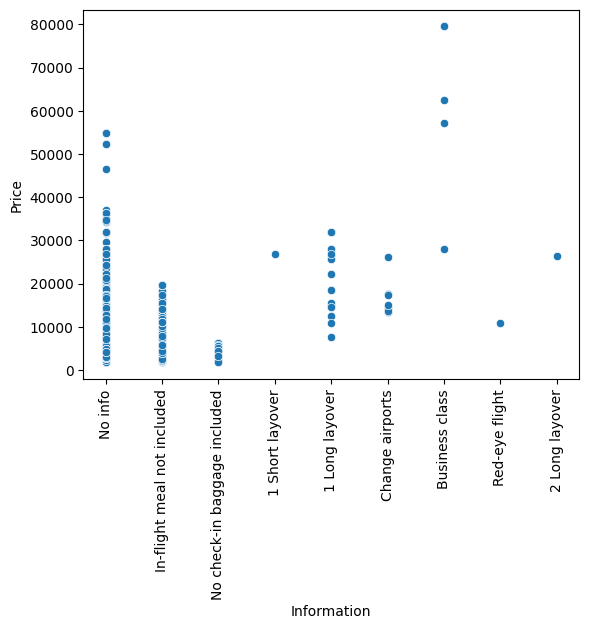

"\n        here we can see that these categories in the column:[ '1 Short layover',\n       '1 Long layover', 'Change airports', 'Business class',\n       'Red-eye flight', '2 Long layover']\n       are having very less amount of datapoints and so if we encode these all into numerics it will be not beneficial and it will increase in computational\n       power, the role of ['No info', 'In-flight meal not included',\n       'No check-in baggage included'] these columns are high and so we will encode this as 0,1,2 while for others first we will change them to 'other categories'\n       then we will encode 'other categories' to 3 \n"

In [40]:
sns.scatterplot(x=df['Additional_Info'], y=df['Price'])
plt.xticks(rotation=90)
plt.xlabel('Information')
plt.ylabel('Price')
plt.show()

"""
        here we can see that these categories in the column:[ '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover']
       are having very less amount of datapoints and so if we encode these all into numerics it will be not beneficial and it will increase in computational
       power, the role of ['No info', 'In-flight meal not included',
       'No check-in baggage included'] these columns are high and so we will encode this as 0,1,2 while for others first we will change them to 'other categories'
       then we will encode 'other categories' to 3 
"""

In [41]:
df['Additional_Info'].replace({
     '1 Short layover':'Other Categories',
     '1 Long layover':'Other Categories',
     'Change airports':'Other Categories',
     'Business class':'Other Categories',
     'Red-eye flight':'Other Categories',
     '2 Long layover':'Other Categories'
  
},inplace=True)

In [42]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', 'Other Categories'], dtype=object)

## Handling Dep_Time column

In [43]:
df.Dep_Time.unique()
# here the values are such as 22:20 so we have to split it first with : and then we will extract the 0th and 1st index for hours and minutes 
# then we will make two column with Dep_hour and Dep_minutes

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [44]:
# Splitting Dep Time
def split_Dep_Time(Dep_Time):
    Dep_hour = 0
    Dep_minute = 0 
    parts = Dep_Time.split(':')
    for part in parts:
       Dep_hour = int(parts[0])
       Dep_minute = int(parts[1])
    return pd.Series([Dep_hour,Dep_minute])
df[['Dep_hour', 'Dep_minute']] = df['Dep_Time'].apply(split_Dep_Time) # making two columns for deo hours and dep minutes

In [45]:
# converting to datetime 
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_minute"] = pd.to_datetime(df["Dep_Time"]).dt.minute

In [46]:
df.drop(columns='Dep_Time',inplace=True)

In [47]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_minute,Duration_in_minutes,Dep_hour,Dep_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,0,No info,3897,1,10,170,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,13,15,445,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,4,25,1140,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,23,30,325,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,21,35,285,16,50


In [48]:
df.info() # checking datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10683 non-null  object
 1   Date_of_Journey      10683 non-null  object
 2   Source               10683 non-null  object
 3   Destination          10683 non-null  object
 4   Route                10682 non-null  object
 5   Total_Stops          10683 non-null  int64 
 6   Additional_Info      10683 non-null  object
 7   Price                10683 non-null  int64 
 8   Arrival_hour         10683 non-null  int32 
 9   Arrival_minute       10683 non-null  int32 
 10  Duration_in_minutes  10683 non-null  int64 
 11  Dep_hour             10683 non-null  int32 
 12  Dep_minute           10683 non-null  int32 
dtypes: int32(4), int64(3), object(6)
memory usage: 918.2+ KB


## Handling Missing value in Route column

In [49]:
df.isnull().sum()

Airline                0
Date_of_Journey        0
Source                 0
Destination            0
Route                  1
Total_Stops            0
Additional_Info        0
Price                  0
Arrival_hour           0
Arrival_minute         0
Duration_in_minutes    0
Dep_hour               0
Dep_minute             0
dtype: int64

In [50]:
df.Route.value_counts() # checking mode

Route
DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
                                     ... 
BOM → VNS → DEL → HYD                   1
BLR → HBX → BOM → NAG → DEL             1
BLR → BOM → IXC → DEL                   1
BLR → CCU → BBI → HYD → VGA → DEL       1
BOM → BBI → HYD                         1
Name: count, Length: 128, dtype: int64

In [51]:
df['Route'].fillna('DEL → BOM → COK',inplace=True) # replacing with mode

In [52]:
df.isnull().sum() # successfull replaced!

Airline                0
Date_of_Journey        0
Source                 0
Destination            0
Route                  0
Total_Stops            0
Additional_Info        0
Price                  0
Arrival_hour           0
Arrival_minute         0
Duration_in_minutes    0
Dep_hour               0
Dep_minute             0
dtype: int64

## Handling Duplicate values in the Dataset

In [53]:
df[df.duplicated()] # checking only duplicate datas in the dataset. 220 rows are duplicates so we will remove them 

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_minute,Duration_in_minutes,Dep_hour,Dep_minute
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,2,No info,13376,4,25,830,14,35
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,2,No info,10231,19,15,1275,22,0
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,2,No info,12392,19,15,1560,17,15
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,2,In-flight meal not included,10368,4,25,1375,5,30
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,0,No info,7303,21,20,175,18,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,2,No info,12819,12,35,810,23,5
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,2,No info,13014,12,35,1615,9,40
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,2,In-flight meal not included,11733,12,35,1615,9,40
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,2,In-flight meal not included,11150,19,0,1195,23,5


In [54]:
df.drop_duplicates(keep='first',inplace=True) # removing duplicates

In [55]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_minute,Duration_in_minutes,Dep_hour,Dep_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,0,No info,3897,1,10,170,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,13,15,445,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,4,25,1140,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,23,30,325,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,21,35,285,16,50


In [56]:
df.shape

(10461, 13)

## Count Plots of Categorical Columns

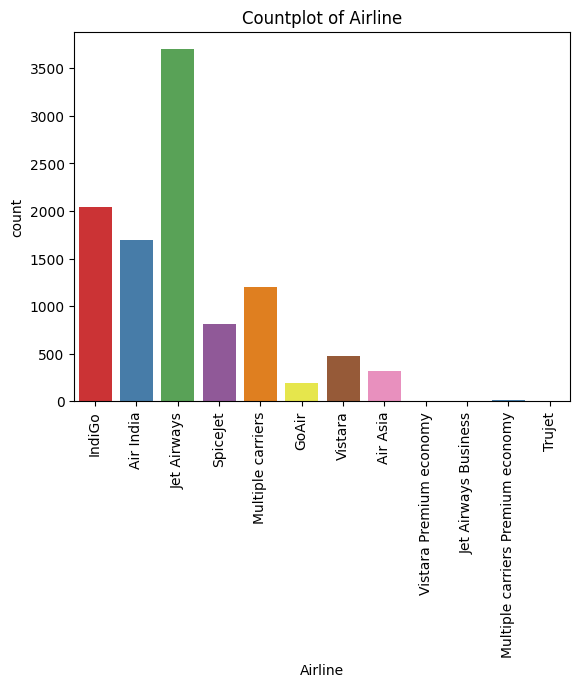

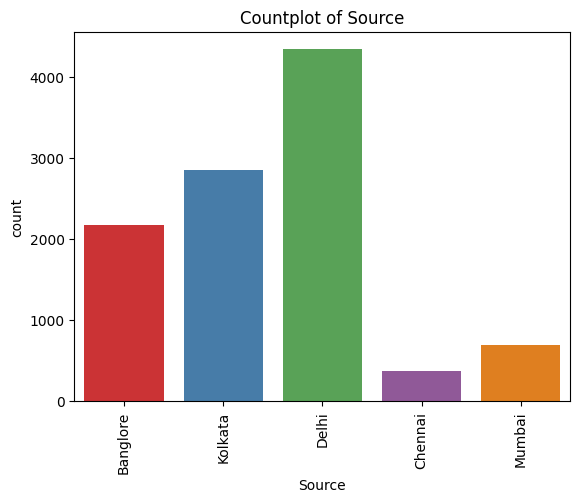

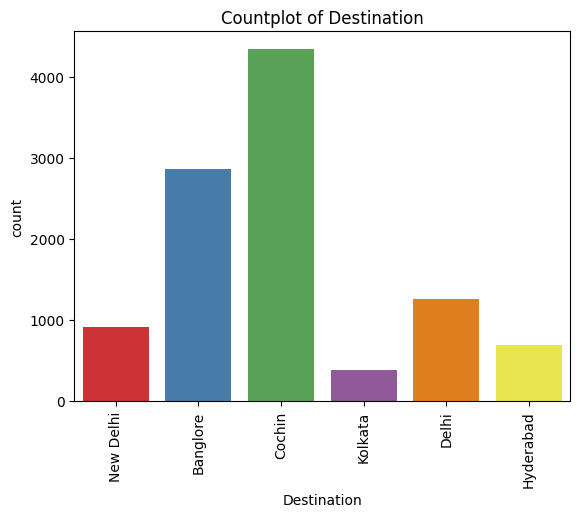

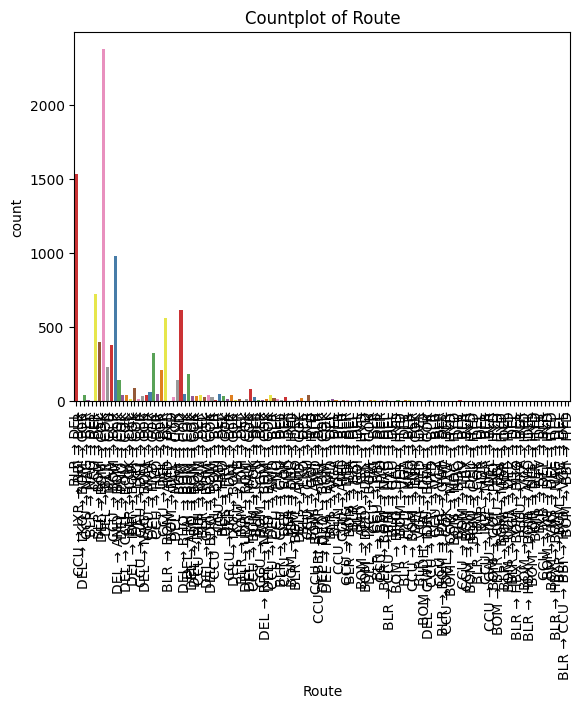

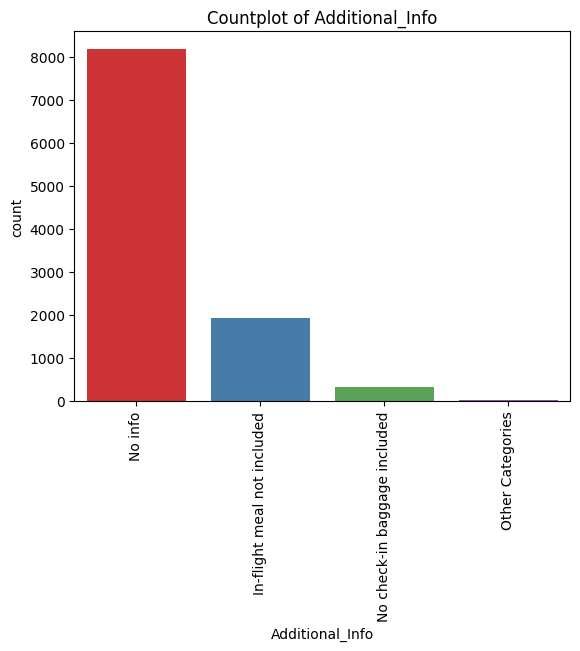

In [57]:
# plotting only categorical column's count plot 

categorical_data = df.select_dtypes(exclude='number').drop('Date_of_Journey',axis=1)
for column in categorical_data.columns:
    sns.countplot(data=categorical_data, x=column, palette="Set1")
    plt.title(f"Countplot of {column}")
    plt.xticks(rotation=90)
    plt.show()

## Handling Date_of_Journey Column

In [58]:
df.Date_of_Journey.unique() # here the values are 24/03/2019 like this, so we will first split by / and then we will extract 0th,1st and 2nd index 
# for day,month and year respectively

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [59]:
# splitting date of journey
def split_Date_of_Journey(Date_of_Journey):
    Journey_day = 0
    Journey_month = 0
    Journey_year = 0
    parts = Date_of_Journey.split('/')
    for part in parts:
       Journey_day = int(parts[0])
       Journey_month = int(parts[1])
       Journey_year = int(parts[2])
    return pd.Series([Journey_day,Journey_month,Journey_year])
df[['Journey_day', 'Journey_month','Journey_year']] = df['Date_of_Journey'].apply(split_Date_of_Journey) # making three columns 

In [60]:
df.drop(columns='Date_of_Journey',inplace = True)

In [61]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_minute,Duration_in_minutes,Dep_hour,Dep_minute,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,1,10,170,22,20,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,13,15,445,5,50,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,4,25,1140,9,25,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,23,30,325,18,5,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,21,35,285,16,50,1,3,2019


In [62]:
df.Dep_minute.dtype

dtype('int32')

In [63]:
df.drop(columns='Journey_year',inplace = True)
# as the year is only 2019 in our data so theree is no need 

# 1. Price Analysis


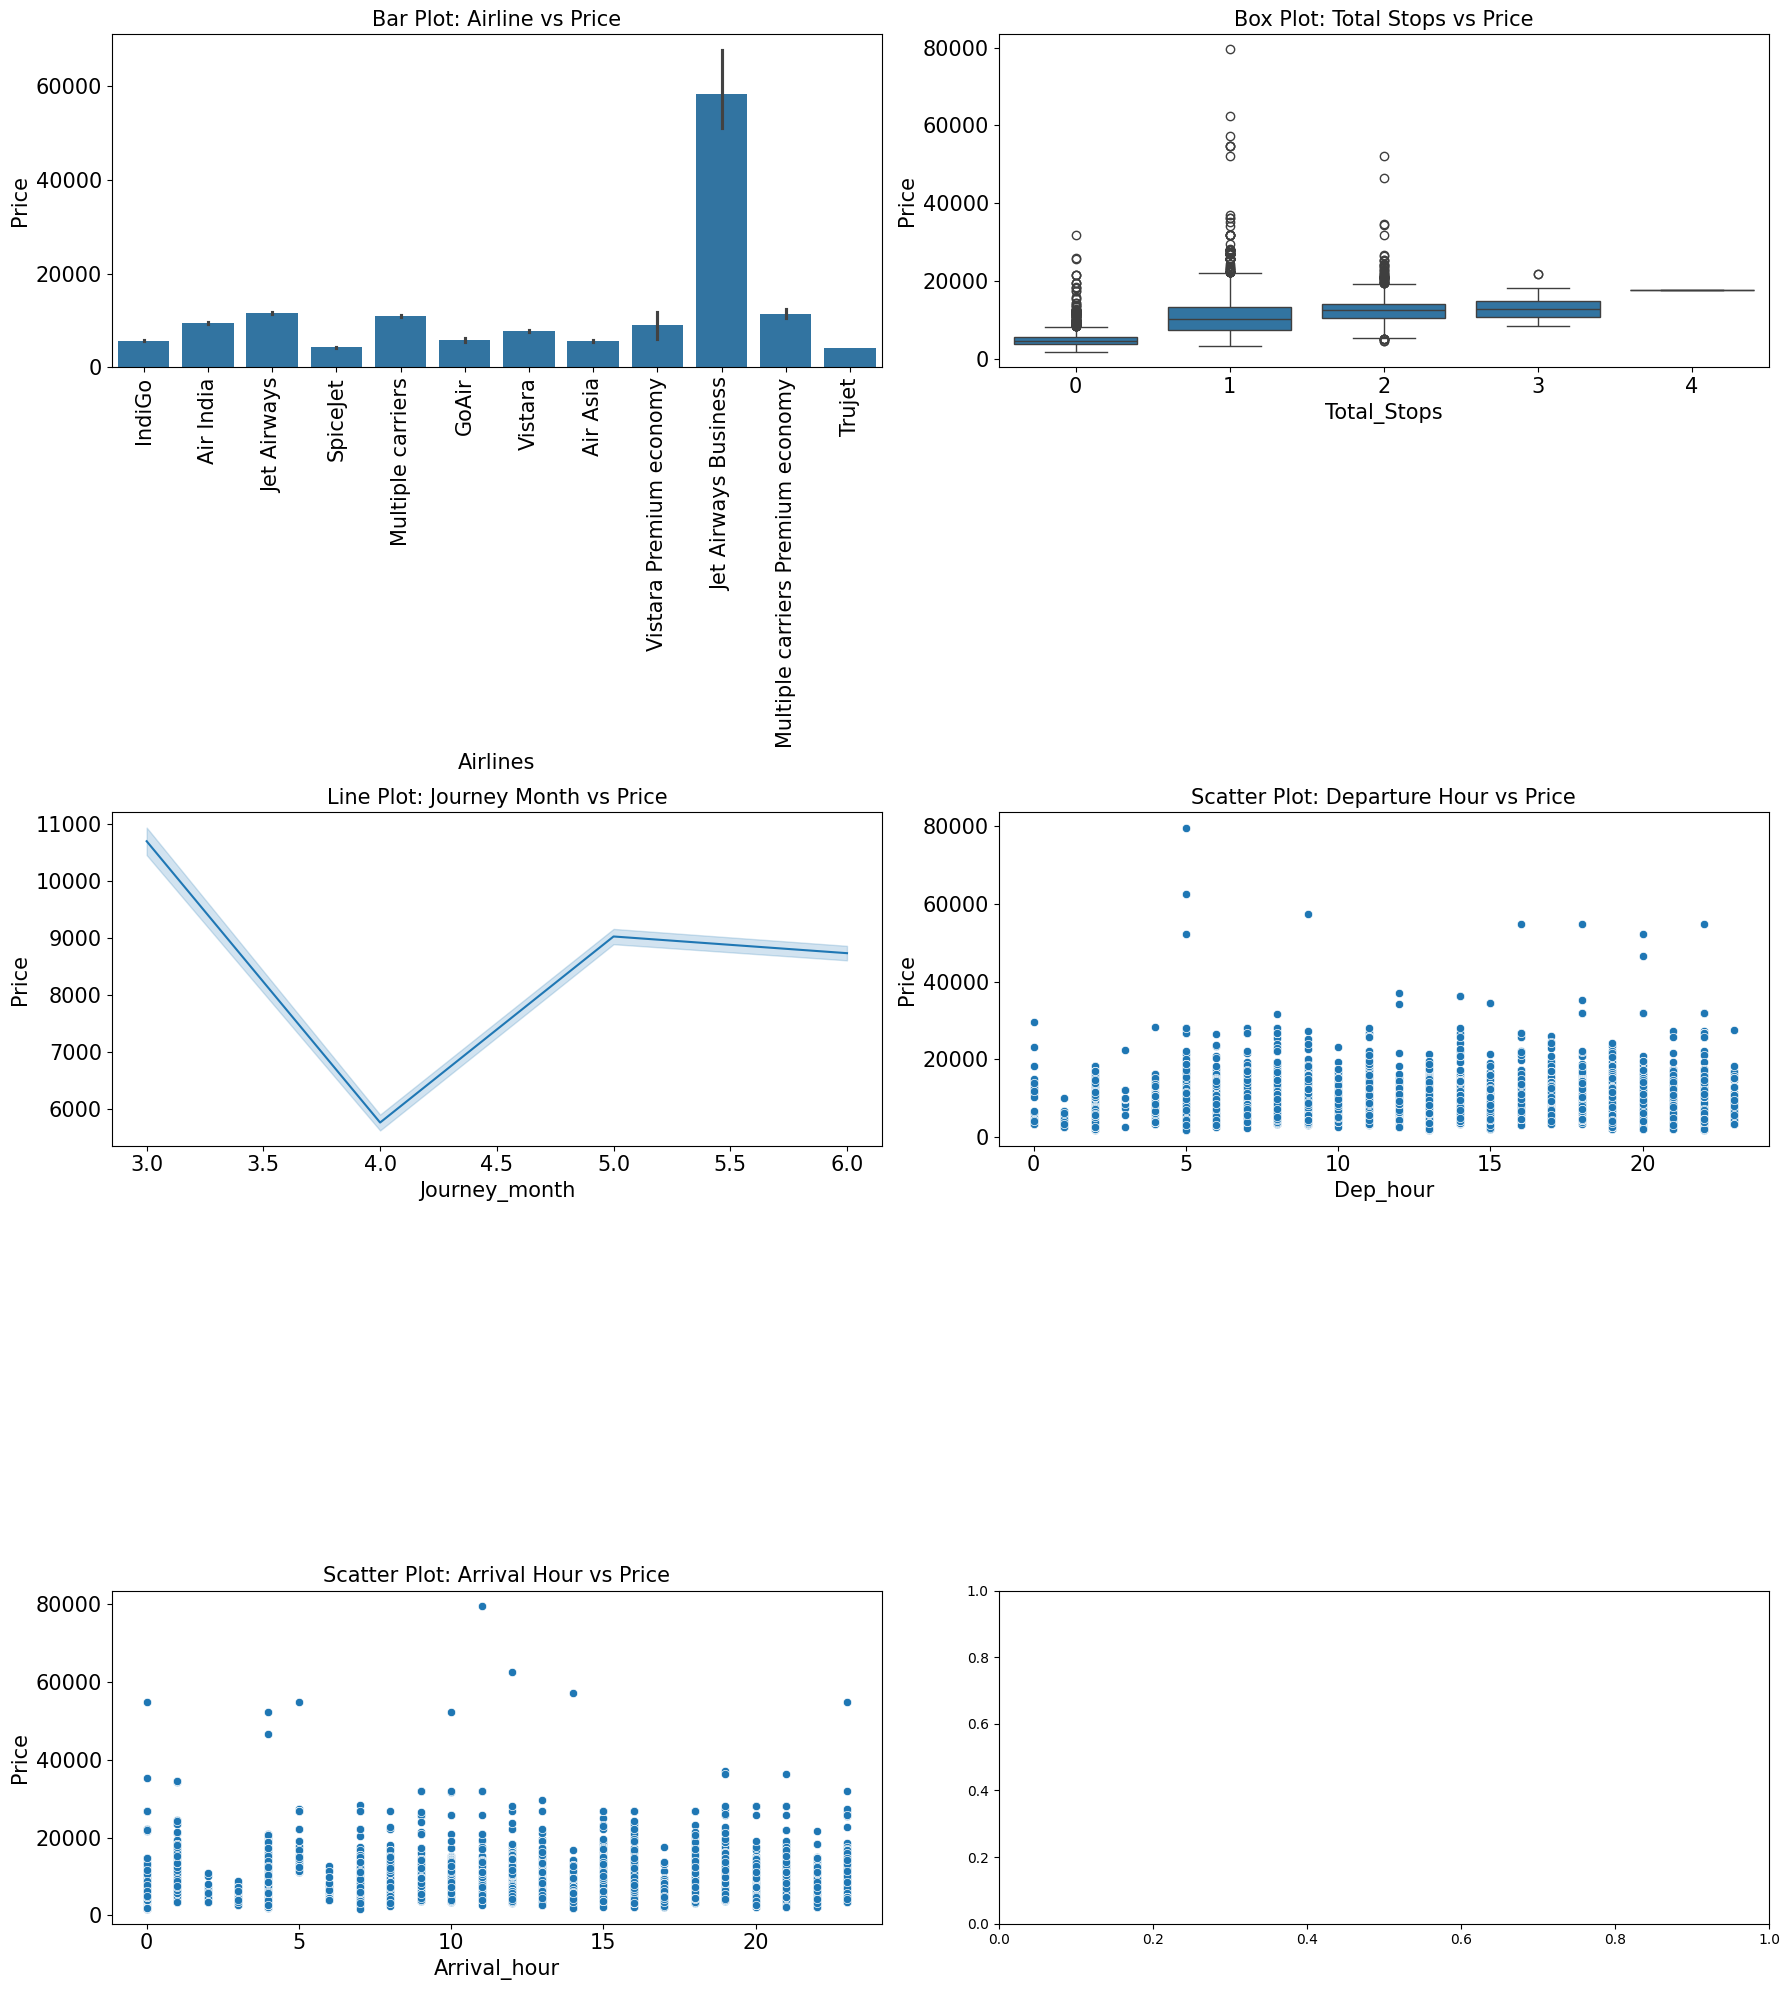

In [64]:
fig, axes = plt.subplots(3, 2, figsize=(18, 20))  # Adjust figsize for better spacing
axes = axes.flatten()

# Plot 1: Bar Plot (Airline vs Price)
sns.barplot(x=df['Airline'], y=df['Price'], ax=axes[0])
axes[0].set_title("Bar Plot: Airline vs Price", fontsize=15)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_xlabel('Airlines',fontsize=15)
axes[0].set_ylabel('Price',fontsize=15)
axes[0].tick_params(axis='x', labelsize=15) 
axes[0].tick_params(axis='y', labelsize=15)

# Plot 2: Box Plot (Total_Stops vs Price)
sns.boxplot(x='Total_Stops', y='Price', data=df, ax=axes[1])
axes[1].set_title("Box Plot: Total Stops vs Price", fontsize=15)
axes[1].set_xlabel('Total_Stops',fontsize=15)
axes[1].set_ylabel('Price',fontsize=15)
axes[1].tick_params(axis='x', labelsize=15) 
axes[1].tick_params(axis='y', labelsize=15)

# Plot 3: Line Plot (Journey_month vs Price)
# we can see here that the price is highest in march and lowest in april and average in june and july 
sns.lineplot(x='Journey_month', y='Price', data=df, ax=axes[2])
axes[2].set_title("Line Plot: Journey Month vs Price", fontsize=15)
axes[2].set_xlabel('Journey_month',fontsize=15)
axes[2].set_ylabel('Price',fontsize=15)
axes[2].tick_params(axis='x', labelsize=15) 
axes[2].tick_params(axis='y', labelsize=15)

# Plot 4: Scatter Plot (Dep_hour vs Price)
sns.scatterplot(x='Dep_hour', y='Price', data=df, ax=axes[3])
axes[3].set_title("Scatter Plot: Departure Hour vs Price", fontsize=15)
axes[3].set_xlabel('Dep_hour',fontsize=15)
axes[3].set_ylabel('Price',fontsize=15)
axes[3].tick_params(axis='x', labelsize=15) 
axes[3].tick_params(axis='y', labelsize=15)

# Plot 5: Scatter Plot (Arrival_hour vs Price)
sns.scatterplot(x='Arrival_hour', y='Price', data=df, ax=axes[4])
axes[4].set_title("Scatter Plot: Arrival Hour vs Price", fontsize=15)
axes[4].set_xlabel('Arrival_hour',fontsize=15)
axes[4].set_ylabel('Price',fontsize=15)
axes[4].tick_params(axis='x', labelsize=15) 
axes[4].tick_params(axis='y', labelsize=15)


plt.tight_layout()

plt.show()

# 2. Duration Analysis

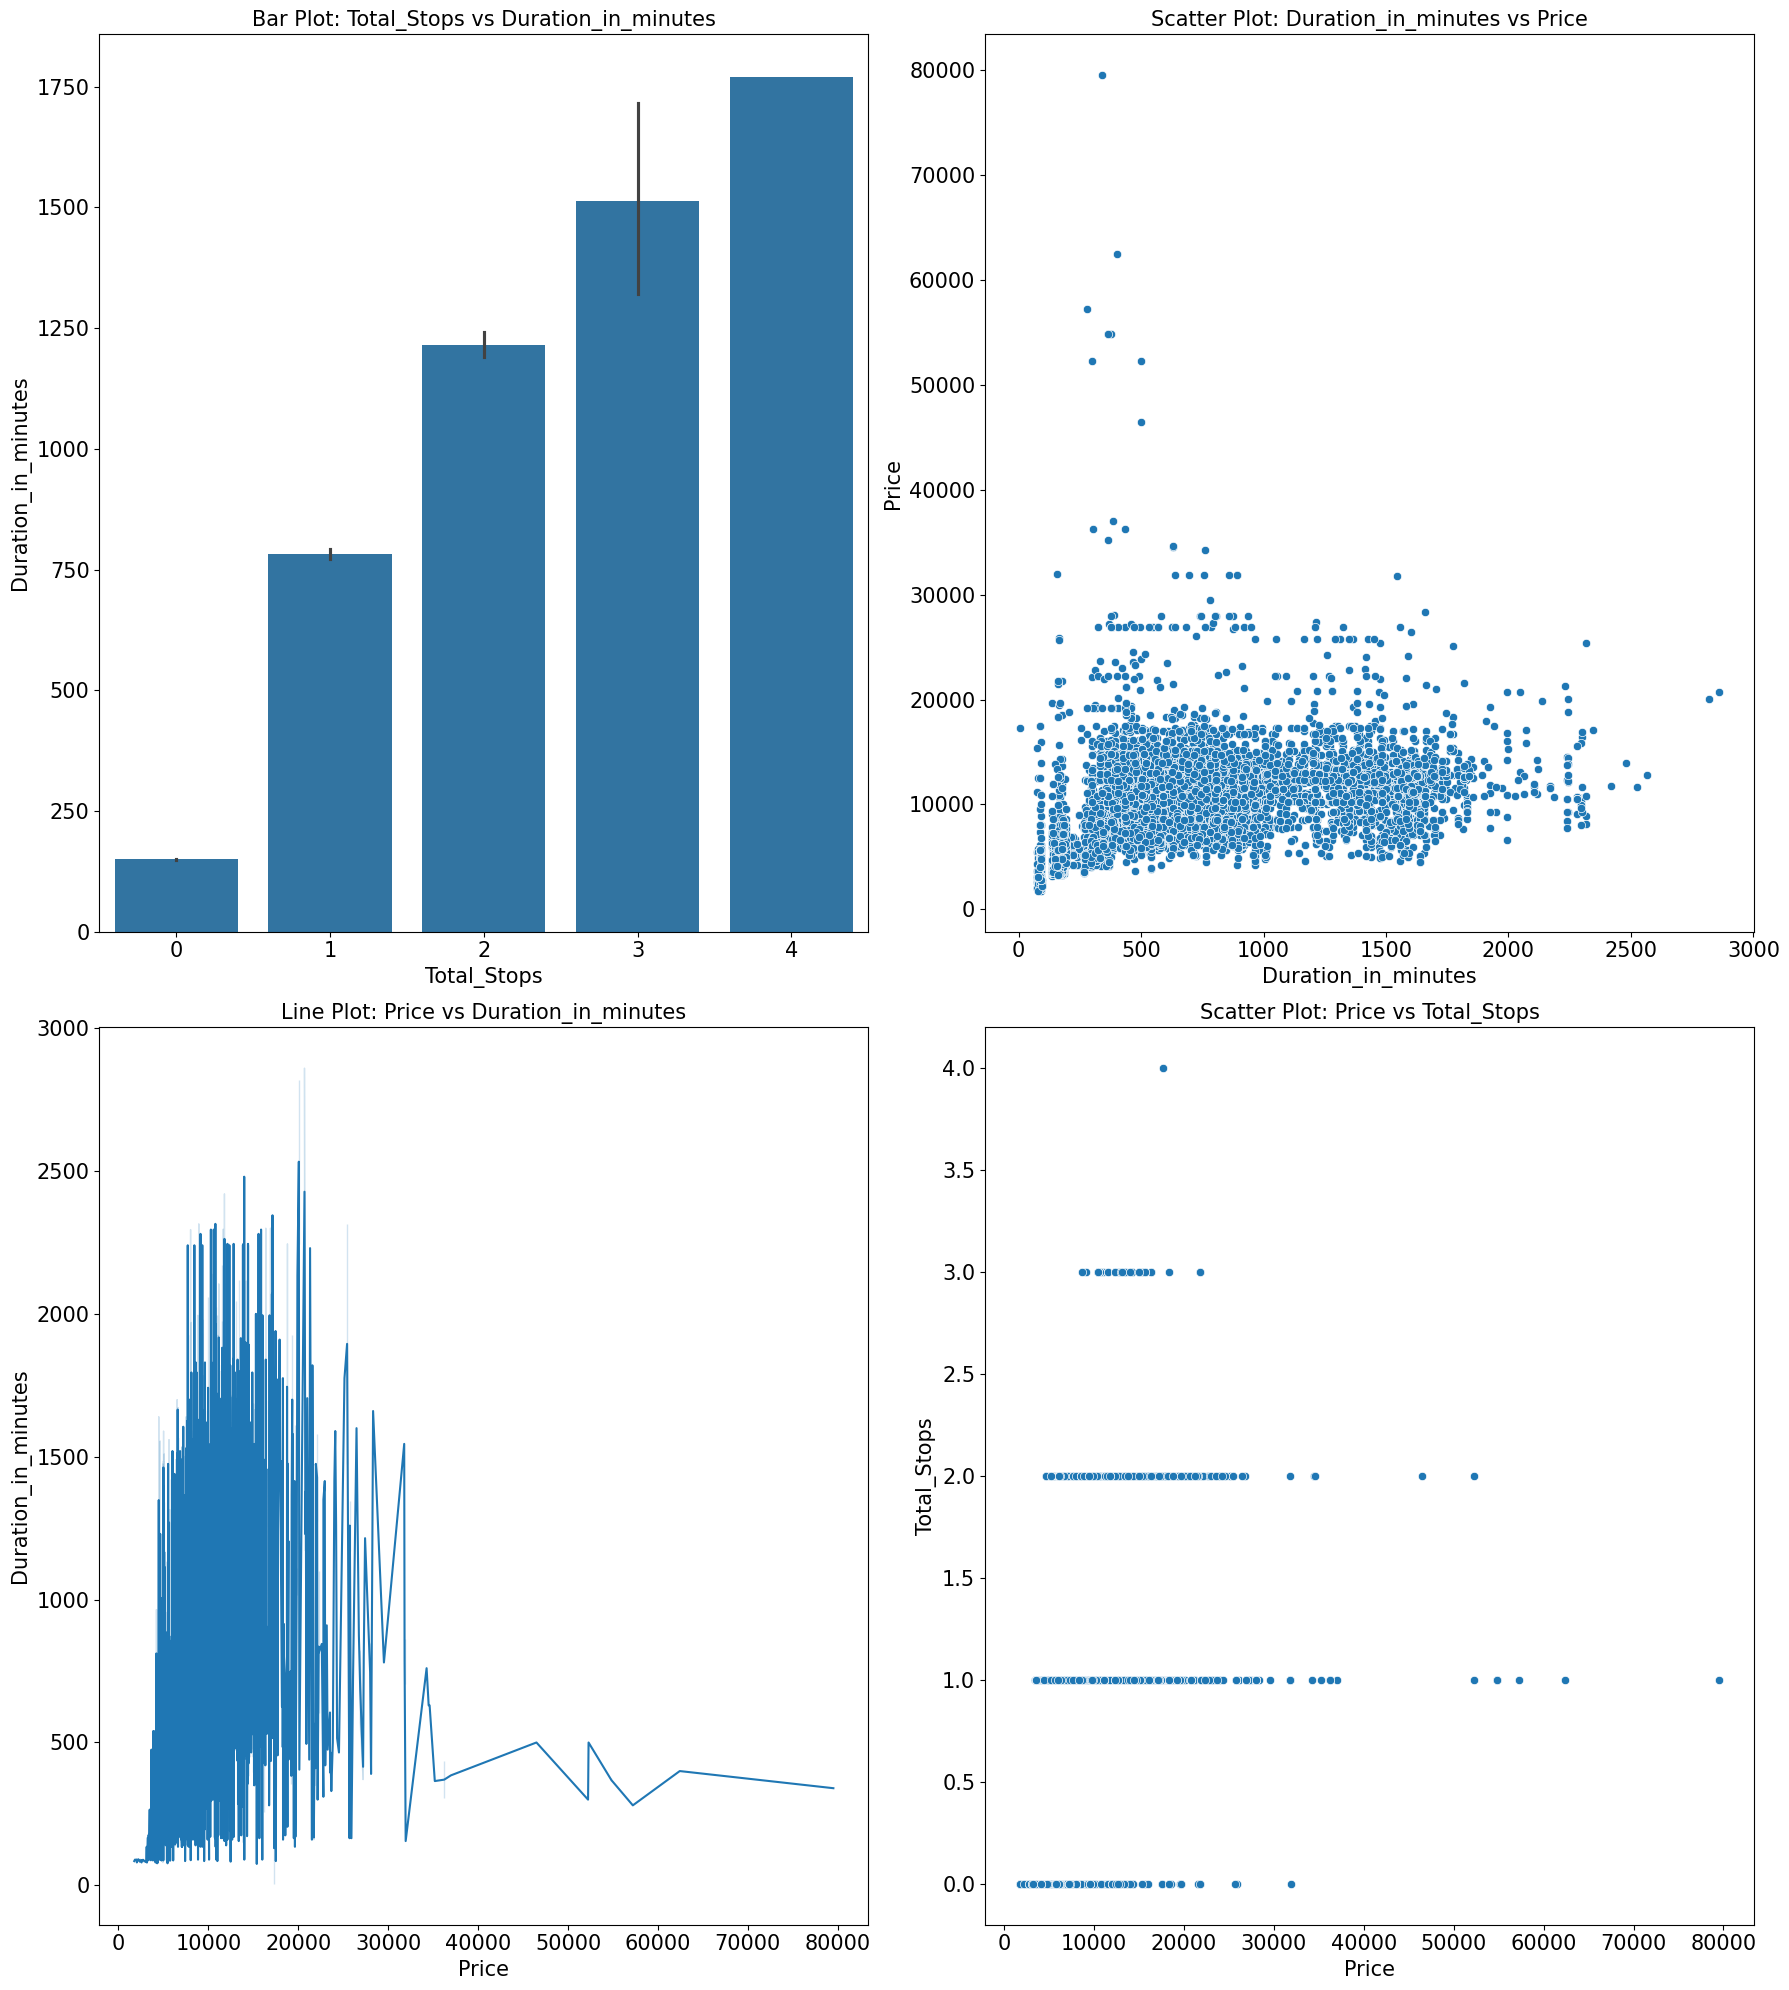

In [65]:
fig, axes = plt.subplots(2, 2, figsize=(18, 20))  # Adjust figsize for better spacing
axes = axes.flatten()

# Plot 1: Bar Plot (Total_Stops vs Duration_in_minutes)
sns.barplot(x='Total_Stops', y='Duration_in_minutes', data=df, ax=axes[0])
axes[0].set_title("Bar Plot: Total_Stops vs Duration_in_minutes", fontsize=15)
axes[0].set_xlabel('Total_Stops', fontsize=15)
axes[0].set_ylabel('Duration_in_minutes', fontsize=15)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)

# Plot 2: Scatter Plot (Duration_in_minutes vs Price)
sns.scatterplot(x='Duration_in_minutes', y='Price', data=df, ax=axes[1])
axes[1].set_title("Scatter Plot: Duration_in_minutes vs Price", fontsize=15)
axes[1].set_xlabel('Duration_in_minutes', fontsize=15)
axes[1].set_ylabel('Price', fontsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

# Plot 3: Line Plot (Price vs Duration_in_minutes)
sns.lineplot(x='Price', y='Duration_in_minutes', data=df, ax=axes[2])
axes[2].set_title("Line Plot: Price vs Duration_in_minutes", fontsize=15)
axes[2].set_xlabel('Price', fontsize=15)
axes[2].set_ylabel('Duration_in_minutes', fontsize=15)
axes[2].tick_params(axis='x', labelsize=15)
axes[2].tick_params(axis='y', labelsize=15)

# Plot 4: Scatter Plot (Price vs Total_Stops)
sns.scatterplot(x='Price', y='Total_Stops', data=df, ax=axes[3])
axes[3].set_title("Scatter Plot: Price vs Total_Stops", fontsize=15)
axes[3].set_xlabel('Price', fontsize=15)
axes[3].set_ylabel('Total_Stops', fontsize=15)
axes[3].tick_params(axis='x', labelsize=15)
axes[3].tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

# 3. Time-Based Trends

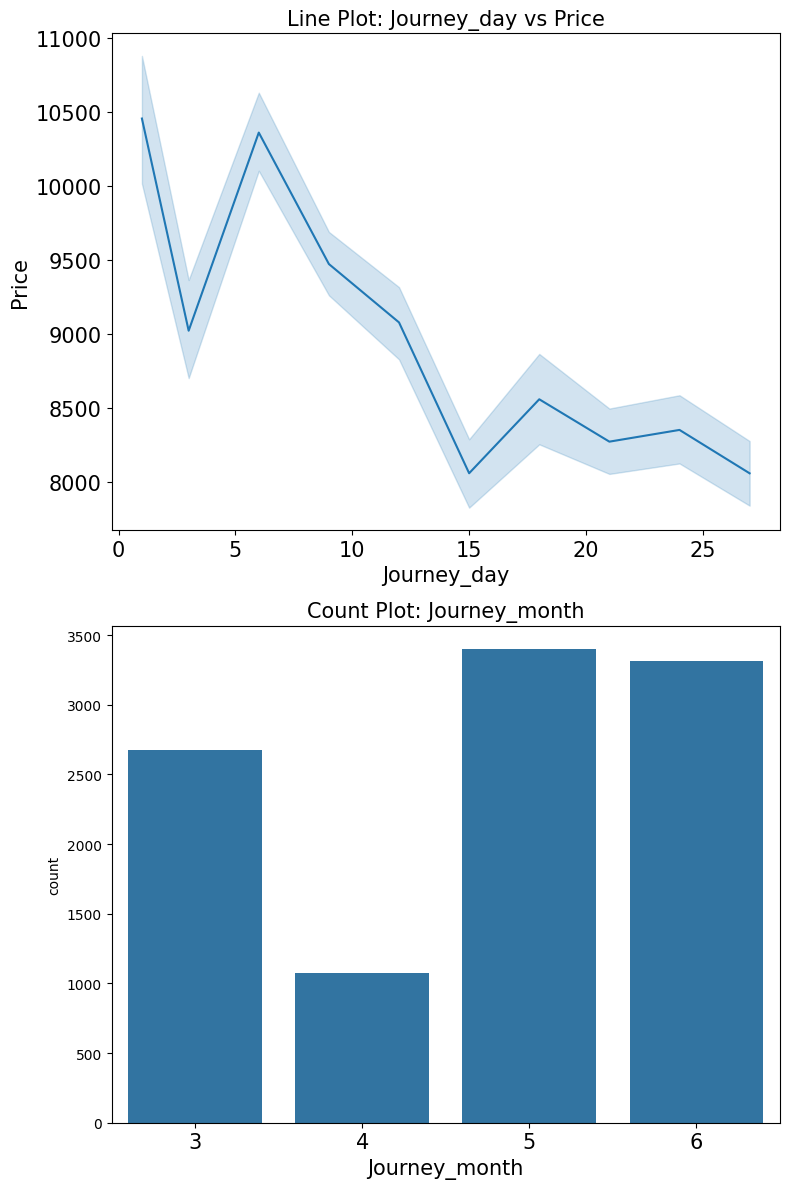

In [66]:
fig, axes = plt.subplots(2, 1, figsize=(8, 12))  # Create a grid of 2 rows and 1 column

# Plot 1: Line Plot (Journey_day vs Price)
sns.lineplot(x='Journey_day', y='Price', data=df, ax=axes[0])
axes[0].set_title("Line Plot: Journey_day vs Price", fontsize=15)
axes[0].set_xlabel('Journey_day', fontsize=15)
axes[0].set_ylabel('Price', fontsize=15)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)

# Plot 2: Count Plot (Journey_month)
sns.countplot(x='Journey_month', data=df, ax=axes[1])
axes[1].set_title("Count Plot: Journey_month", fontsize=15)
axes[1].set_xlabel('Journey_month', fontsize=15)
axes[1].tick_params(axis='x', labelsize=15)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# 4. Categorical Comparisons

In [67]:
df.groupby(['Source', 'Destination'])['Price'].mean().sort_values(ascending=False)

Source    Destination
Banglore  New Delhi      12020.496711
Delhi     Cochin         10460.914634
Kolkata   Banglore        9143.083566
Banglore  Delhi           5143.918577
Mumbai    Hyderabad       5059.708752
Chennai   Kolkata         4789.892388
Name: Price, dtype: float64

<Axes: ylabel='Additional_Info'>

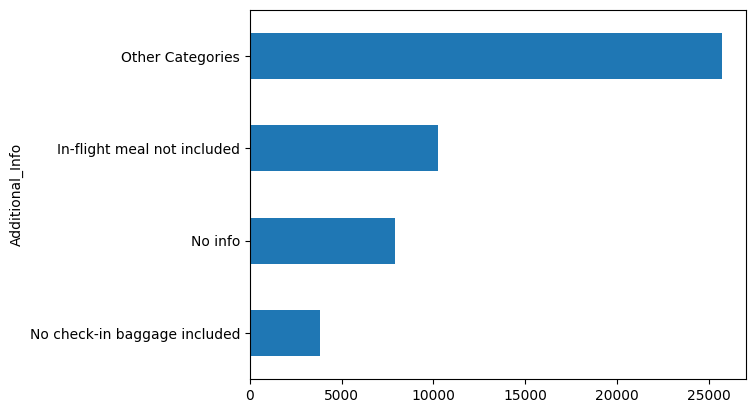

In [68]:
df.groupby('Additional_Info')['Price'].median().sort_values().plot(kind='barh')

<Axes: ylabel='Airline'>

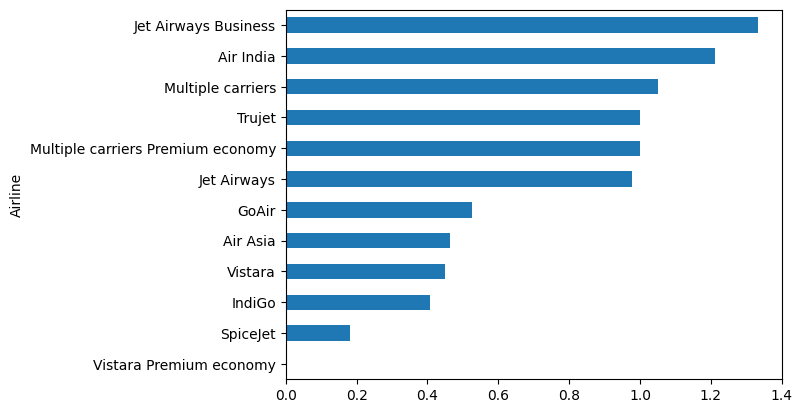

In [69]:
df.groupby('Airline')['Total_Stops'].mean().sort_values().plot(kind='barh')

In [70]:
df.groupby('Route')['Duration_in_minutes'].max().sort_values()

Route
BOM → HYD                  95
MAA → CCU                 165
CCU → BLR                 170
BLR → DEL                 185
BOM → NDC → HYD           195
                         ... 
BLR → CCU → GAU → DEL    2420
CCU → GAU → DEL → BLR    2480
DEL → JAI → BOM → COK    2565
DEL → IDR → BOM → COK    2820
DEL → AMD → BOM → COK    2860
Name: Duration_in_minutes, Length: 128, dtype: int64

In [71]:
df.groupby(['Route','Duration_in_minutes'])['Price'].mean().sort_values()

Route                  Duration_in_minutes
BOM → HYD              95                      2276.133333
                       80                      3286.377049
MAA → CCU              165                     3643.333333
CCU → HYD → BLR        475                     3673.000000
BOM → HYD              90                      3721.484456
                                                  ...     
BLR → BOM → DEL        1325                   26890.000000
                       365                    27081.625000
                       370                    27210.000000
DEL → IDR → BOM → COK  630                    30198.000000
DEL → ATQ → BOM → COK  500                    49387.500000
Name: Price, Length: 1060, dtype: float64

In [72]:
df.groupby(['Airline'])['Price'].mean().sort_values(ascending=True)

Airline
Trujet                                4140.000000
SpiceJet                              4335.841718
Air Asia                              5593.745283
IndiGo                                5668.469897
GoAir                                 5861.056701
Vistara                               7801.761006
Vistara Premium economy               8962.333333
Air India                             9555.382891
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11599.021081
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

# 5. Correlation Analysis

<Axes: >

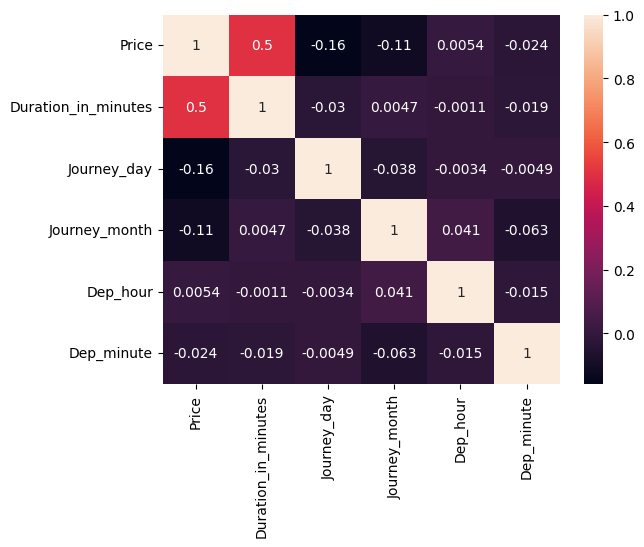

In [73]:
numeric_cols = ['Price', 'Duration_in_minutes', 'Journey_day', 'Journey_month', 'Dep_hour','Dep_minute']
sns.heatmap(df[numeric_cols].corr(), annot=True)

<div style="text-align: center; background-color: #f0f8ff; color: #004080; padding: 20px; border-radius: 10px;">

# 🎯 FeaturTransformationon

We identify and select the most relevant features that contribute significantly to the predictive power of the model. This step helps reduce dimensionality and improve efficiency.

</div>

## Airlines

In [74]:
df.groupby(['Airline']).describe()['Price'].sort_values('mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
Jet Airways Business,6.0,58358.666667,11667.596748,46490.0,52243.0,54747.0,61122.50,79512.0
Jet Airways,3700.0,11599.021081,4315.671402,1840.0,8586.0,11134.0,14151.00,54826.0
Multiple carriers Premium economy,13.0,11418.846154,1717.153936,9845.0,10161.0,11269.0,11269.00,14629.0
Multiple carriers,1196.0,10902.678094,3721.234997,5797.0,7723.0,10197.0,13587.00,36983.0
Air India,1695.0,9555.382891,3937.036277,2050.0,6602.5,9292.0,12199.00,31945.0
Vistara Premium economy,3.0,8962.333333,2915.405518,5969.0,7547.0,9125.0,10459.00,11793.0
Vistara,477.0,7801.761006,2918.335811,3687.0,5403.0,7980.0,9345.00,21730.0
GoAir,194.0,5861.056701,2703.585767,3398.0,3898.0,5135.0,6811.25,22794.0
IndiGo,2043.0,5668.469897,2266.933697,2227.0,4226.0,5000.0,6493.00,22153.0


In [75]:
Airline = df.Airline
Price = df.Price

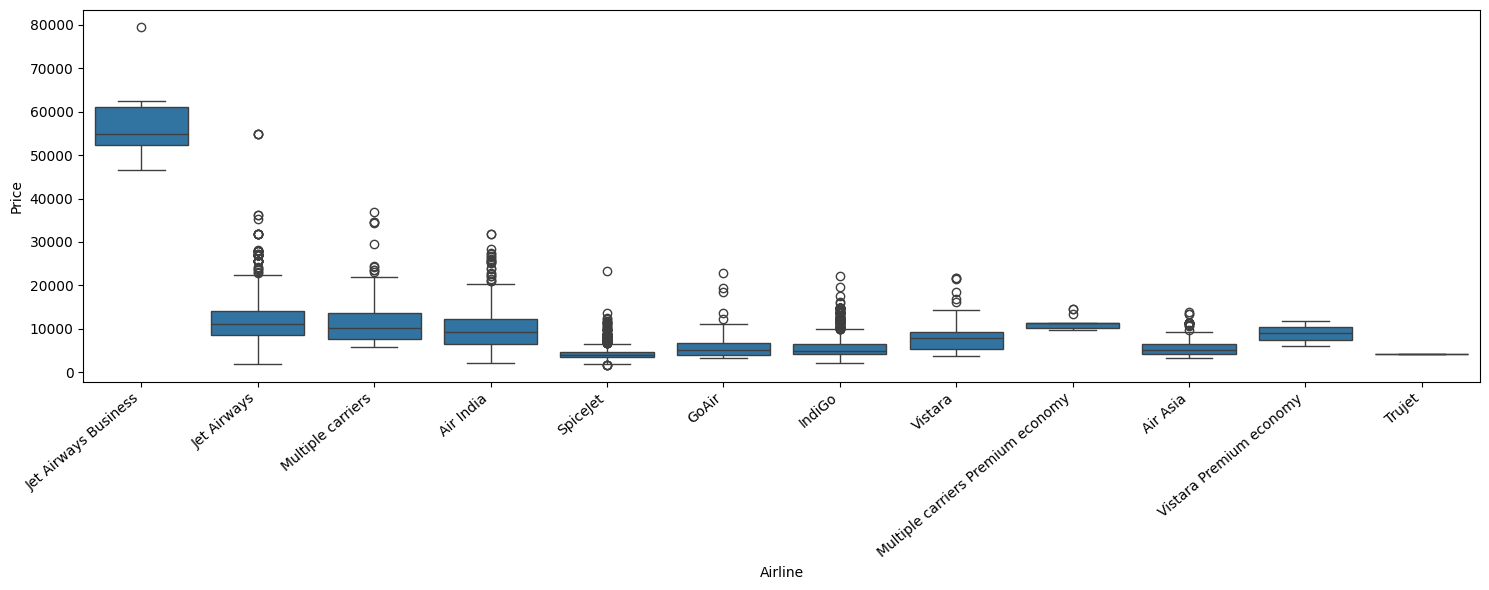

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' is your DataFrame containing 'Airline' and 'Price' columns
plt.figure(figsize=(15, 6))
ax = sns.boxplot(x='Airline', y='Price', data=df.sort_values('Price', ascending=False))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.tight_layout()
plt.show()

In [77]:
Airline = pd.get_dummies(df['Airline'], drop_first=False)
Airline = Airline.astype(int)
Airline.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [78]:
data = pd.concat([df, Airline], axis=1)

In [79]:
data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_minute,Duration_in_minutes,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,1,10,170,...,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,13,15,445,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,4,25,1140,...,0,0,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,23,30,325,...,0,1,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,21,35,285,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0,No info,4107,22,25,150,...,0,0,0,0,0,0,0,0,0,0
10679,Air India,Kolkata,Banglore,CCU → BLR,0,No info,4145,23,20,155,...,0,0,0,0,0,0,0,0,0,0
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0,No info,7229,11,20,180,...,0,0,1,0,0,0,0,0,0,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,0,No info,12648,14,10,160,...,0,0,0,0,0,0,0,0,1,0


In [80]:
data.drop(columns=['Airline'],axis=1,inplace=True)

In [81]:
data

,Source,Destination,Route,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_minute,Duration_in_minutes,Dep_hour,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,Banglore,New Delhi,BLR → DEL,0,No info,3897,1,10,170,22,...,0,1,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,13,15,445,5,...,0,0,0,0,0,0,0,0,0,0
2,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,4,25,1140,9,...,0,0,1,0,0,0,0,0,0,0
3,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,23,30,325,18,...,0,1,0,0,0,0,0,0,0,0
4,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,21,35,285,16,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Kolkata,Banglore,CCU → BLR,0,No info,4107,22,25,150,19,...,0,0,0,0,0,0,0,0,0,0
10679,Kolkata,Banglore,CCU → BLR,0,No info,4145,23,20,155,20,...,0,0,0,0,0,0,0,0,0,0
10680,Banglore,Delhi,BLR → DEL,0,No info,7229,11,20,180,8,...,0,0,1,0,0,0,0,0,0,0
10681,Banglore,New Delhi,BLR → DEL,0,No info,12648,14,10,160,11,...,0,0,0,0,0,0,0,0,1,0


## Source and Destination

In [82]:
lst = ['Source','Destination']

In [83]:
for columns in lst:
    print(data[[columns]].value_counts(),'\n')

Source  
Delhi       4346
Kolkata     2860
Banglore    2177
Mumbai       697
Chennai      381
Name: count, dtype: int64 

Destination
Cochin         4346
Banglore       2860
Delhi          1265
New Delhi       912
Hyderabad       697
Kolkata         381
Name: count, dtype: int64 



In [84]:
data = pd.get_dummies(data=data,columns=lst,drop_first=False)
data.head()

,Route,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_minute,Duration_in_minutes,Dep_hour,Dep_minute,Journey_day,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,0,No info,3897,1,10,170,22,20,24,...,False,False,False,False,False,False,False,False,False,True
1,CCU → IXR → BBI → BLR,2,No info,7662,13,15,445,5,50,1,...,False,False,True,False,True,False,False,False,False,False
2,DEL → LKO → BOM → COK,2,No info,13882,4,25,1140,9,25,9,...,False,True,False,False,False,True,False,False,False,False
3,CCU → NAG → BLR,1,No info,6218,23,30,325,18,5,12,...,False,False,True,False,True,False,False,False,False,False
4,BLR → NAG → DEL,1,No info,13302,21,35,285,16,50,1,...,False,False,False,False,False,False,False,False,False,True


In [85]:
data.iloc[:, -9:] = data.iloc[:, -9:].astype(int)

In [86]:
data.head()

,Route,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_minute,Duration_in_minutes,Dep_hour,Dep_minute,Journey_day,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,0,No info,3897,1,10,170,22,20,24,...,False,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2,No info,7662,13,15,445,5,50,1,...,False,0,1,0,1,0,0,0,0,0
2,DEL → LKO → BOM → COK,2,No info,13882,4,25,1140,9,25,9,...,False,1,0,0,0,1,0,0,0,0
3,CCU → NAG → BLR,1,No info,6218,23,30,325,18,5,12,...,False,0,1,0,1,0,0,0,0,0
4,BLR → NAG → DEL,1,No info,13302,21,35,285,16,50,1,...,False,0,0,0,0,0,0,0,0,1


## Route

In [87]:
route = df[['Route']]
route.value_counts()

Route                
DEL → BOM → COK          2377
BLR → DEL                1534
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → IXZ → MAA → BLR       1
CCU → RPR → HYD → BLR       1
CCU → IXA → BLR             1
CCU → IXB → DEL → BLR       1
CCU → VTZ → BLR             1
Name: count, Length: 128, dtype: int64

In [88]:
df['Total_Stops'].unique()

array([0, 2, 1, 3, 4])

In [89]:
route['route_1'] = route['Route'].str.split('→').str[0]
route['route_2'] = route['Route'].str.split('→').str[1]
route['route_3'] = route['Route'].str.split('→').str[2]
route['route_4'] = route['Route'].str.split('→').str[3]
route['route_5'] = route['Route'].str.split('→').str[4]

In [90]:
route.head()

,Route,route_1,route_2,route_3,route_4,route_5
0,BLR → DEL,BLR,DEL,NaN,NaN,NaN
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,NaN
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,NaN
3,CCU → NAG → BLR,CCU,NAG,BLR,NaN,NaN
4,BLR → NAG → DEL,BLR,NAG,DEL,NaN,NaN


In [91]:
route.fillna('None',inplace=True)

In [92]:
route.head()

,Route,route_1,route_2,route_3,route_4,route_5
0,BLR → DEL,BLR,DEL,None,None,None
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,None
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,None
3,CCU → NAG → BLR,CCU,NAG,BLR,None,None
4,BLR → NAG → DEL,BLR,NAG,DEL,None,None


In [93]:
le = LabelEncoder()
route['route_1'] = le.fit_transform(route['route_1'])
route['route_2'] = le.fit_transform(route['route_2'])
route['route_3'] = le.fit_transform(route['route_3'])
route['route_4'] = le.fit_transform(route['route_4'])
route['route_5'] = le.fit_transform(route['route_5'])

In [94]:
route.head()

,Route,route_1,route_2,route_3,route_4,route_5
0,BLR → DEL,0,13,29,13,5
1,CCU → IXR → BBI → BLR,2,25,1,3,5
2,DEL → LKO → BOM → COK,3,32,4,5,5
3,CCU → NAG → BLR,2,34,3,13,5
4,BLR → NAG → DEL,0,34,8,13,5


In [95]:
route.nunique()

Route      128
route_1      5
route_2     45
route_3     30
route_4     14
route_5      6
dtype: int64

In [96]:
df.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [97]:
df.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [98]:
route.drop('Route',inplace=True,axis=1)
route.head()

,route_1,route_2,route_3,route_4,route_5
0,0,13,29,13,5
1,2,25,1,3,5
2,3,32,4,5,5
3,2,34,3,13,5
4,0,34,8,13,5


In [99]:
data = pd.concat([data, route], axis=1)
data.head()

,Route,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_minute,Duration_in_minutes,Dep_hour,Dep_minute,Journey_day,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,route_1,route_2,route_3,route_4,route_5
0,BLR → DEL,0,No info,3897,1,10,170,22,20,24,...,0,0,0,0,1,0,13,29,13,5
1,CCU → IXR → BBI → BLR,2,No info,7662,13,15,445,5,50,1,...,0,0,0,0,0,2,25,1,3,5
2,DEL → LKO → BOM → COK,2,No info,13882,4,25,1140,9,25,9,...,1,0,0,0,0,3,32,4,5,5
3,CCU → NAG → BLR,1,No info,6218,23,30,325,18,5,12,...,0,0,0,0,0,2,34,3,13,5
4,BLR → NAG → DEL,1,No info,13302,21,35,285,16,50,1,...,0,0,0,0,1,0,34,8,13,5


In [100]:
data.drop('Route',inplace=True,axis=1)
data.head()

,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_minute,Duration_in_minutes,Dep_hour,Dep_minute,Journey_day,Journey_month,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,route_1,route_2,route_3,route_4,route_5
0,0,No info,3897,1,10,170,22,20,24,3,...,0,0,0,0,1,0,13,29,13,5
1,2,No info,7662,13,15,445,5,50,1,5,...,0,0,0,0,0,2,25,1,3,5
2,2,No info,13882,4,25,1140,9,25,9,6,...,1,0,0,0,0,3,32,4,5,5
3,1,No info,6218,23,30,325,18,5,12,5,...,0,0,0,0,0,2,34,3,13,5
4,1,No info,13302,21,35,285,16,50,1,3,...,0,0,0,0,1,0,34,8,13,5


## Additional Info

In [101]:
Additional_Info = pd.get_dummies(df['Additional_Info'], drop_first=False)
Additional_Info = Additional_Info.astype(int)
Additional_Info.head()

,In-flight meal not included,No check-in baggage included,No info,Other Categories
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [102]:
data = pd.concat([data, Additional_Info], axis=1)
data.head()

,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_minute,Duration_in_minutes,Dep_hour,Dep_minute,Journey_day,Journey_month,...,Destination_New Delhi,route_1,route_2,route_3,route_4,route_5,In-flight meal not included,No check-in baggage included,No info,Other Categories
0,0,No info,3897,1,10,170,22,20,24,3,...,1,0,13,29,13,5,0,0,1,0
1,2,No info,7662,13,15,445,5,50,1,5,...,0,2,25,1,3,5,0,0,1,0
2,2,No info,13882,4,25,1140,9,25,9,6,...,0,3,32,4,5,5,0,0,1,0
3,1,No info,6218,23,30,325,18,5,12,5,...,0,2,34,3,13,5,0,0,1,0
4,1,No info,13302,21,35,285,16,50,1,3,...,1,0,34,8,13,5,0,0,1,0


In [103]:
data.drop(['Additional_Info'],axis=1,inplace=True)
data.head()

,Total_Stops,Price,Arrival_hour,Arrival_minute,Duration_in_minutes,Dep_hour,Dep_minute,Journey_day,Journey_month,Air Asia,...,Destination_New Delhi,route_1,route_2,route_3,route_4,route_5,In-flight meal not included,No check-in baggage included,No info,Other Categories
0,0,3897,1,10,170,22,20,24,3,0,...,1,0,13,29,13,5,0,0,1,0
1,2,7662,13,15,445,5,50,1,5,0,...,0,2,25,1,3,5,0,0,1,0
2,2,13882,4,25,1140,9,25,9,6,0,...,0,3,32,4,5,5,0,0,1,0
3,1,6218,23,30,325,18,5,12,5,0,...,0,2,34,3,13,5,0,0,1,0
4,1,13302,21,35,285,16,50,1,3,0,...,1,0,34,8,13,5,0,0,1,0


<div style="text-align: center; background-color: #f0f8ff; color: #004080; padding: 20px; border-radius: 10px;">

# 🛠️ Model Building

Multiple machine learning models are evaluated for flight fare prediction. We'll implement and assess each model's performance with detailed metrics printing.

</div>

In [104]:
X = data.drop('Price',axis=1)
y=df['Price']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [106]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [107]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print(50 *'*')
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (7322, 40)
The size of training output is (7322,)
**************************************************
The size of testing input is (3139, 40)
The size of testing output is (3139,)


<div style="text-align: center; background-color: #f0f8ff; color: #004080; padding: 20px; border-radius: 10px;">

# 📈 Linear Regression Model Making and Evaluation

We build and evaluate a **Linear Regression** model to predict flight fares. This simple and interpretable model serves as a baseline for comparison with more complex algorithms.

</div>

In [108]:
# this is the formula to calculate accuracy we are jussst subtracting thee error with the 100 sso that we can get the accuracy

def accuracy(y_train, y_pred):
    errors = abs(y_train - y_pred)
    mape = 100 * np.mean(errors / y_train)
    accuracy = 100 - mape
    return accuracy

In [109]:
LN = LinearRegression()
LN.fit(X_train,y_train)
y_pred_lr = LN.predict(X_test)
y_pred_train_lr = LN.predict(X_train)

In [110]:
print("\nLinear Regression Training Metrics:")
print(f"Training R² Score (proportion of variance explained): {r2_score(y_train, y_pred_train_lr)* 100:.2f}%")
print(f"Training RMSE (Root Mean Squared Error in price units): {np.sqrt(mean_squared_error(y_train, y_pred_train_lr)):.2f}")
print(f"Training MAE (Mean Absolute Error in price units): {mean_absolute_error(y_train, y_pred_train_lr):.2f}")
print(f"Training MAPE (Mean Absolute Percentage Error): {mean_absolute_percentage_error(y_train, y_pred_train_lr) * 100:.2f}%")


Linear Regression Training Metrics:
Training R² Score (proportion of variance explained): 69.39%
Training RMSE (Root Mean Squared Error in price units): 2567.07
Training MAE (Mean Absolute Error in price units): 1748.76
Training MAPE (Mean Absolute Percentage Error): 21.03%


In [111]:
print("\nLinear Regression Testing Metrics:")
print(f"\nTesting R² Score (proportion of variance explained): {r2_score(y_test, y_pred_lr)* 100:.2f}%")
print(f"Testing RMSE (Root Mean Squared Error in price units): {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.2f}")
print(f"Testing MAE (Mean Absolute Error in price units): {mean_absolute_error(y_test, y_pred_lr):.2f}")
print(f"Testing MAPE (Mean Absolute Percentage Error): {mean_absolute_percentage_error(y_test, y_pred_lr) * 100:.2f}%")


Linear Regression Testing Metrics:

Testing R² Score (proportion of variance explained): 70.84%
Testing RMSE (Root Mean Squared Error in price units): 2476.33
Testing MAE (Mean Absolute Error in price units): 1708.80
Testing MAPE (Mean Absolute Percentage Error): 21.59%


In [112]:
print(f"Testing Custom Accuracy (100 - MAPE): {accuracy(y_test, y_pred_lr):.2f}%")

Testing Custom Accuracy (100 - MAPE): 78.41%


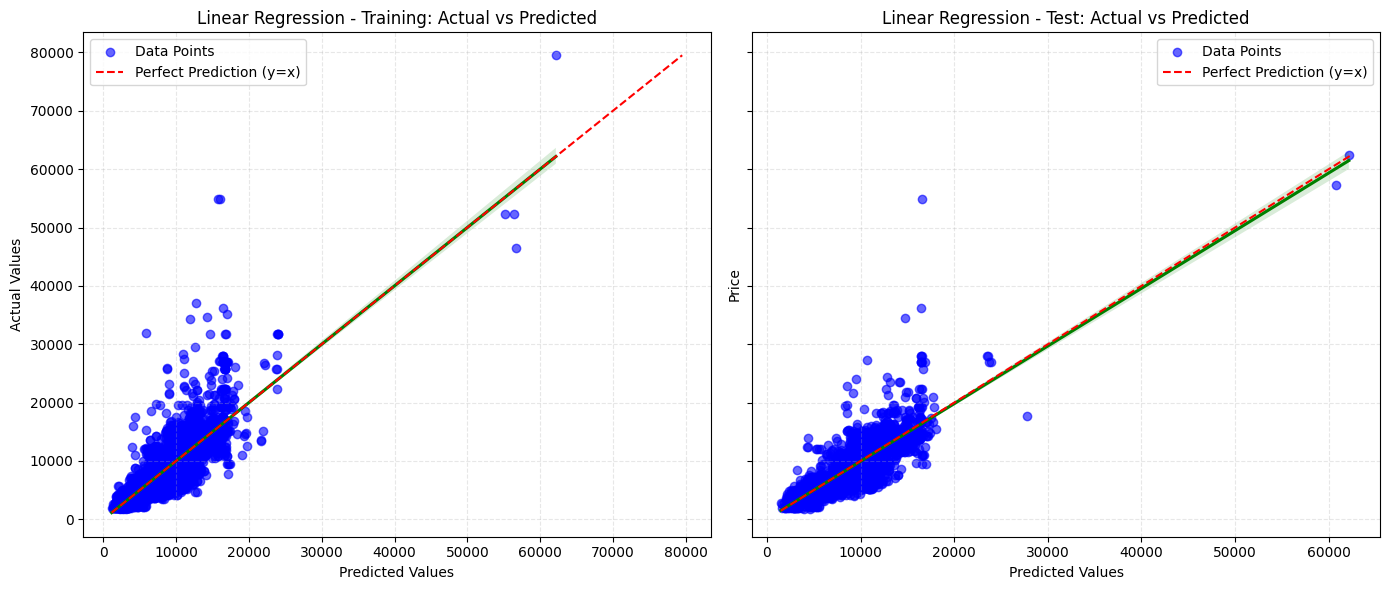

In [113]:
# Visualization: Actual vs Predicted
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Training Data Plot
ax1.scatter(y_pred_train_lr, y_train, alpha=0.6, color="blue", label="Data Points")
sns.regplot(x=y_pred_train_lr, y=y_train, scatter=False, color="green", line_kws={"label": "Best Fit Line"}, ax=ax1)
min_val_train = min(min(y_pred_train_lr), min(y_train))
max_val_train = max(max(y_pred_train_lr), max(y_train))
ax1.plot([min_val_train, max_val_train], [min_val_train, max_val_train], color="red", linestyle="--", label="Perfect Prediction (y=x)")
ax1.set_title("Linear Regression - Training: Actual vs Predicted")
ax1.set_xlabel("Predicted Values")
ax1.set_ylabel("Actual Values")
ax1.legend()
ax1.grid(True, linestyle="--", alpha=0.3)

# Test Data Plot
ax2.scatter(y_pred_lr, y_test, alpha=0.6, color="blue", label="Data Points")
sns.regplot(x=y_pred_lr, y=y_test, scatter=False, color="green", line_kws={"label": "Best Fit Line"}, ax=ax2)
min_val_test = min(min(y_pred_lr), min(y_test))
max_val_test = max(max(y_pred_lr), max(y_test))
ax2.plot([min_val_test, max_val_test], [min_val_test, max_val_test], color="red", linestyle="--", label="Perfect Prediction (y=x)")
ax2.set_title("Linear Regression - Test: Actual vs Predicted")
ax2.set_xlabel("Predicted Values")
ax2.legend()
ax2.grid(True, linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()

<div style="text-align: center; background-color: #f0f8ff; color: #004080; padding: 20px; border-radius: 10px;">

# 🌳 Decision Tree Model Making and Evaluation

We build and evaluate a **Decision Tree** model to predict flight fares. This simple yet interpretable model serves as a baseline for comparison with more complex algorithms.

</div>

In [114]:
DT = DecisionTreeRegressor()
DT.fit(X_train,y_train)
y_pred_1 = DT.predict(X_test)
y_pred_train_1 = DT.predict(X_train)

In [115]:
print("\nDecision Tree Training Metrics:")
print(f"Training R² Score (proportion of variance explained): {r2_score(y_train, y_pred_train_1) * 100:.2f}%")
print(f"Training RMSE (Root Mean Squared Error in price units): {np.sqrt(mean_squared_error(y_train, y_pred_train_1)):.2f}")
print(f"Training MAE (Mean Absolute Error in price units): {mean_absolute_error(y_train, y_pred_train_1):.2f}")
print(f"Training MAPE (Mean Absolute Percentage Error): {mean_absolute_percentage_error(y_train, y_pred_train_1) * 100:.2f}%")


Decision Tree Training Metrics:
Training R² Score (proportion of variance explained): 99.70%
Training RMSE (Root Mean Squared Error in price units): 255.48
Training MAE (Mean Absolute Error in price units): 31.52
Training MAPE (Mean Absolute Percentage Error): 0.37%


In [116]:
print("\nDecision Tree Testing Metrics:")
print(f"Testing R² Score (proportion of variance explained): {r2_score(y_test, y_pred_1) * 100:.2f}%")
print(f"Testing RMSE (Root Mean Squared Error in price units): {np.sqrt(mean_squared_error(y_test, y_pred_1)):.2f}")
print(f"Testing MAE (Mean Absolute Error in price units): {mean_absolute_error(y_test, y_pred_1):.2f}")
print(f"Testing MAPE (Mean Absolute Percentage Error): {mean_absolute_percentage_error(y_test, y_pred_1) * 100:.2f}%")


Decision Tree Testing Metrics:
Testing R² Score (proportion of variance explained): 76.35%
Testing RMSE (Root Mean Squared Error in price units): 2230.25
Testing MAE (Mean Absolute Error in price units): 782.36
Testing MAPE (Mean Absolute Percentage Error): 8.79%


In [117]:
print(f"Testing Custom Accuracy (100 - MAPE): {accuracy(y_test, y_pred_1):.2f}%")

Testing Custom Accuracy (100 - MAPE): 91.21%


<div style="text-align: center; background-color: #f0f8ff; color: #004080; padding: 20px; border-radius: 10px;">

# 🌲 Random Forest Model Making and Evaluation

Next, we construct and assess a **Random Forest** model. This ensemble method combines multiple decision trees to improve accuracy and robustness.

</div>

In [118]:
RF = RandomForestRegressor(n_estimators=500,min_samples_split=3)
RF.fit(X_train,y_train)
y_pred_2 = RF.predict(X_test)
y_pred_train_2 = RF.predict(X_train)

In [119]:
print("\nRandom Forest Training Metrics:")
print(f"Training R² Score (proportion of variance explained): {r2_score(y_train, y_pred_train_2) * 100:.2f}%")
print(f"Training RMSE (Root Mean Squared Error in price units): {np.sqrt(mean_squared_error(y_train, y_pred_train_2)):.2f}")
print(f"Training MAE (Mean Absolute Error in price units): {mean_absolute_error(y_train, y_pred_train_2):.2f}")
print(f"Training MAPE (Mean Absolute Percentage Error): {mean_absolute_percentage_error(y_train, y_pred_train_2) * 100:.2f}%")


Random Forest Training Metrics:
Training R² Score (proportion of variance explained): 97.66%
Training RMSE (Root Mean Squared Error in price units): 709.50
Training MAE (Mean Absolute Error in price units): 290.51
Training MAPE (Mean Absolute Percentage Error): 3.31%


In [120]:
print("\nRandom Forest Testing Metrics:")
print(f"Testing R² Score (proportion of variance explained): {r2_score(y_test, y_pred_2) * 100:.2f}%")
print(f"Testing RMSE (Root Mean Squared Error in price units): {np.sqrt(mean_squared_error(y_test, y_pred_2)):.2f}")
print(f"Testing MAE (Mean Absolute Error in price units): {mean_absolute_error(y_test, y_pred_2):.2f}")
print(f"Testing MAPE (Mean Absolute Percentage Error): {mean_absolute_percentage_error(y_test, y_pred_2) * 100:.2f}%")


Random Forest Testing Metrics:
Testing R² Score (proportion of variance explained): 89.27%
Testing RMSE (Root Mean Squared Error in price units): 1502.30
Testing MAE (Mean Absolute Error in price units): 672.39
Testing MAPE (Mean Absolute Percentage Error): 7.92%


In [121]:
print(f"Testing Custom Accuracy (100 - MAPE): {accuracy(y_test, y_pred_2):.2f}%")

Testing Custom Accuracy (100 - MAPE): 92.08%



<div style="text-align: center; background-color: #f0f8ff; color: #004080; padding: 20px; border-radius: 10px;">

# 💪 XGBoost Model Making and Evaluation

We implement and evaluate the **XGBoost** model, a powerful gradient-boosting algorithm known for its speed and performance in handling complex datasets.

</div>

In [122]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred_3 = xgb.predict(X_test)
y_pred_train_3 = xgb.predict(X_train)

In [123]:
print("\nXGBoost Training Metrics:")
print(f"Training R² Score (proportion of variance explained): {r2_score(y_train, y_pred_train_3) * 100:.2f}%")
print(f"Training RMSE (Root Mean Squared Error in price units): {np.sqrt(mean_squared_error(y_train, y_pred_train_3)):.2f}")
print(f"Training MAE (Mean Absolute Error in price units): {mean_absolute_error(y_train, y_pred_train_3):.2f}")
print(f"Training MAPE (Mean Absolute Percentage Error): {mean_absolute_percentage_error(y_train, y_pred_train_3) * 100:.2f}%")


XGBoost Training Metrics:
Training R² Score (proportion of variance explained): 97.58%
Training RMSE (Root Mean Squared Error in price units): 722.36
Training MAE (Mean Absolute Error in price units): 454.41
Training MAPE (Mean Absolute Percentage Error): 5.62%


In [124]:
print("\nXGBoost Testing Metrics:")
print(f"Testing R² Score (proportion of variance explained): {r2_score(y_test, y_pred_3) * 100:.2f}%")
print(f"Testing RMSE (Root Mean Squared Error in price units): {np.sqrt(mean_squared_error(y_test, y_pred_3)):.2f}")
print(f"Testing MAE (Mean Absolute Error in price units): {mean_absolute_error(y_test, y_pred_3):.2f}")
print(f"Testing MAPE (Mean Absolute Percentage Error): {mean_absolute_percentage_error(y_test, y_pred_3) * 100:.2f}%")



XGBoost Testing Metrics:
Testing R² Score (proportion of variance explained): 90.52%
Testing RMSE (Root Mean Squared Error in price units): 1412.11
Testing MAE (Mean Absolute Error in price units): 734.52
Testing MAPE (Mean Absolute Percentage Error): 8.59%


In [125]:
print(f"Testing Custom Accuracy (100 - MAPE): {accuracy(y_test, y_pred_3):.2f}%")

Testing Custom Accuracy (100 - MAPE): 91.41%


<div style="text-align: center; background-color: #f0f8ff; color: #004080; padding: 20px; border-radius: 10px;">

# ⚙️ Hyperparameter Tuning

In this final step, we optimize the hyperparameters of our models using techniques like **Grid Search** or **Randomized Search**. This ensures the best possible performance for our predictions.

</div>

In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [127]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
random_regressor.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='neg_mean_absolute_error')

In [128]:
y_train_pred_tuned = random_regressor.predict(X_train)
y_test_pred_tuned = random_regressor.predict(X_test)

In [129]:
print("\nTuned Random Forest Training Metrics:")
print(f"Best Parameters: {random_regressor.best_params_}")
print(f"Training R² Score (proportion of variance explained): {r2_score(y_train, y_train_pred_tuned) * 100:.2f}%")
print(f"Training RMSE (Root Mean Squared Error in price units): {np.sqrt(mean_squared_error(y_train, y_train_pred_tuned)):.2f}")
print(f"Training MAE (Mean Absolute Error in price units): {mean_absolute_error(y_train, y_train_pred_tuned):.2f}")
print(f"Training MAPE (Mean Absolute Percentage Error): {mean_absolute_percentage_error(y_train, y_train_pred_tuned) * 100:.2f}%")


Tuned Random Forest Training Metrics:
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1}
Training R² Score (proportion of variance explained): 98.10%
Training RMSE (Root Mean Squared Error in price units): 639.63
Training MAE (Mean Absolute Error in price units): 257.07
Training MAPE (Mean Absolute Percentage Error): 2.91%


In [130]:
print("\nTuned Random Forest Testing Metrics:")
print(f"Testing R² Score (proportion of variance explained): {r2_score(y_test, y_test_pred_tuned) * 100:.2f}%")
print(f"Testing RMSE (Root Mean Squared Error in price units): {np.sqrt(mean_squared_error(y_test, y_test_pred_tuned)):.2f}")
print(f"Testing MAE (Mean Absolute Error in price units): {mean_absolute_error(y_test, y_test_pred_tuned):.2f}")
print(f"Testing MAPE (Mean Absolute Percentage Error): {mean_absolute_percentage_error(y_test, y_test_pred_tuned) * 100:.2f}%")



Tuned Random Forest Testing Metrics:
Testing R² Score (proportion of variance explained): 89.11%
Testing RMSE (Root Mean Squared Error in price units): 1513.03
Testing MAE (Mean Absolute Error in price units): 667.70
Testing MAPE (Mean Absolute Percentage Error): 7.80%


In [131]:
print(f"Testing Custom Accuracy (100 - MAPE): {accuracy(y_test, y_test_pred_tuned):.2f}%")

Testing Custom Accuracy (100 - MAPE): 92.20%


<div style="text-align: center; background: linear-gradient(90deg, #FF4500, #FF6347); color: #FFFFFF; padding: 25px; border-radius: 15px; box-shadow: 0 4px 8px rgba(0,0,0,0.2); margin-bottom: 20px;">

# ✨ Flight Fare Prediction: Model Comparison Report ✨

### <span style="font-size: 40px; font-weight: bold; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">Best Model - Tuned Random Forest: 92.19% Accuracy</span>

</div>

---

## 🚀 Performance Overview

The table below compares five machine learning models evaluated for flight fare prediction: **Linear Regression**, **Decision Tree**, **Random Forest**, **XGBoost**, and **Tuned Random Forest**. Metrics include R² Score (proportion of variance explained), RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), MAPE (Mean Absolute Percentage Error), and Custom Accuracy (and testing.

<table style="width: 100%; border-collapse: collapse; margin: 25px 0; font-family: 'Arial', sans-serif; box-shadow: 0 2px 5px rgba(0,0,0,0.1);">
  <tr style="background: linear-gradient(90deg, #f0f8ff, #e6f0fa); color: #004080; font-weight: bold;">
    <th style="padding: 15px; border: 2px solid #004080; font-size: 16px;">Model</th>
    <th style="padding: 15px; border: 2px solid #004080; font-size: 16px;">Train R²</th>
    <th style="padding: 15px; border: 2px solid #004080; font-size: 16px;">Test R²</th>
    <th style="padding: 15px; border: 2px solid #004080; font-size: 16px;">Test RMSE</th>
    <th style="padding: 15px; border: 2px solid #004080; font-size: 16px;">Test MAE</th>
    <th style="padding: 15px; border: 2px solid #004080; font-size: 16px;">Test MAPE</th>
    <th style="padding: 15px; border: 2px solid #004080; font-size: 16px;">Accuracy</th>
    <th style="padding: 15px; border: 2px solid #004080; font-size: 16px;">Fit Status</th>
  </tr>
  <tr>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px;">Linear Regression</td>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px; color: #FF4500;">69.39%</td>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px; color: #FF4500;">70.87%</td>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px;">2475.11</td>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px;">1707.86</td>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px;">21.57%</td>
    <td style="padding: 12px; border: 2px so1id #ddd; font-size: 14px;">78.43%</td>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px; color: #32CD32;">Good Fit</td>
  </tr>
  <tr>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px;">Decision Tree</td>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px; color: #FF4500;">99.70%</td>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px; color: #32CD32;">79.22%</td>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px;">2090.42</td>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px;">748.21</td>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px;">8.42%</td>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px;">91.58%</td>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px; color: #FF4500;">Overfitting (>10% diff)</td>
  </tr>
  <tr>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px;">Random Forest</td>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px; color: #FF4500;">97.67%</td>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px; color: #0074D9;">89.36%</td>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px;">1496.19</td>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px;">668.79</td>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px;">7.87%</td>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px;">92.13%</td>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px; color: #32CD32;">Good Fit</td>
  </tr>
  <tr>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px;">XGBoost</td>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px; color: #FF4500;">97.35%</td>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px; color: #0074D9;">91.13%</td>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px;">1365.76</td>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px;">736.99</td>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px;">8.73%</td>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px;">91.27%</td>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px; color: #32CD32;">Good Fit</td>
  </tr>
  <tr style="background: linear-gradient(90deg, #d4edda, #c3e6cb); color: #333333;">
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px;"><strong>Tuned Random Forest</strong></td>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px;"><strong>98.19%</strong></td>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px;"><strong>89.23%</strong></td>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px;"><strong>1504.87</strong></td>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px;"><strong>665.97</strong></td>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px;"><strong>7.81%</strong></td>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px;"><strong>92.19%</strong></td>
    <td style="padding: 12px; border: 2px solid #ddd; font-size: 14px; color: #32CD32;"><strong>Good Fit</strong></td>
  </tr>
</table>

*<small style="font-size: 12px; color: #666666; display: block; text-align: center; margin-top: 10px;">Note: R² Score (higher is better) reflects model explanatory power; RMSE, MAE, and MAPE (lower is better) measure prediction error; Accuracy is 100 - MAPE. Overfitting occurs if Train R² - Test R² > 10%.</small>*

---

## 🔍 Key Insights

- **Linear Regression**: Achieved a moderate Test R² of 70.87% and Accuracy of 78.43%, but high RMSE (2475.11) and MAPE (21.57%) indicate poor precision, suggesting underfitting for complex patterns.
- **Decision Tree**: Extremely high Train R² (99.70%) vs. Test R² (79.22%) shows a >20% gap, confirming **overfitting**. Test Accuracy (91.58%) is good, but error metrics (RMSE: 2090.42) are higher than ensemble methods.
- **Random Forest**: Strong Test R² (89.36%) and Accuracy (92.13%) with lower errors (RMSE: 1496.19, MAE: 668.79), but a Train R² of 97.67% suggests mild overfitting (8.31% gap).
- **XGBoost**: Excellent Test R² (91.13%) and Accuracy (91.27%) with the lowest RMSE (1365.76) among untuned models. Train R² (97.35%) indicates a 6.22% gap, within acceptable fit range.
- **Tuned Random Forest**: Best overall performer with Test Accuracy (92.19%) and Train R² (98.19%), though Test R² (89.23%) shows an 8.96% gap, still a good fit. Slightly higher RMSE (1504.87) than XGBoost but lowest MAE (665.97).

---

## 📊 Fit Analysis

- **Overfitting**: Decision Tree exhibits significant overfitting (99.70% - 79.22% = 20.48% > 10%). Random Forest and Tuned Random Forest show minor overfitting (8.31% and 8.96%), but within tolerable limits.
- **Underfitting**: Linear Regression may underfit, as both Train (69.39%) and Test (70.87%) R² scores are relatively low, failing to capture data complexity.
- **Good Fit**: XGBoost and Tuned Random Forest balance training and testing performance effectively.

---

## 🏆 Conclusion & Recommendation

The **Tuned Random Forest** stands out as the top model with:
- **Highest Test Accuracy**: 92.19%
- **Test R²**: 89.23%
- **Test RMSE**: 1504.87
- **Test MAE**: 665.97
- **Test MAPE**: 7.81%

Despite a slight overfitting tendency (8.96% R² gap), it achieves the best balance of accuracy and error metrics, outperforming Linear Regression (underfit), Decision Tree (overfit), and untuned Random Forest/XGBoost. **XGBoost** is a close contender with a lower RMSE (1365.76) and better generalization (6.22% gap), making it a viable alternative if minimizing RMSE is prioritized. However, **Tuned Random Forest** isest</strong><br>
  <small>Best for cost-effective travel planning with high predictive accuracy.</small>
</div>ly recommended as the best model for production deployment.

<div style="text-align: left; padding: 20px; border-radius: 10px; font-family: Arial, sans-serif; background-color: #FFFFFF; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">

  <!-- Header Section with Gradient Background -->
  <div style="text-align: center; background: linear-gradient(90deg, #FF4500, #FF6347); color: #FFFFFF; padding: 25px; border-radius: 15px; box-shadow: 0 4px 8px rgba(0,0,0,0.2); margin-bottom: 20px;">
    <span style="font-size: 40px; font-weight: bold; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">✨ Flight Fare Prediction: A Comprehensive Data Analysis Report ✨</span>
  </div>

---

  <!-- Content Section with Boundary Effect -->
  <div style="padding: 20px; background-color: #f5f5f5; border: 1px solid #ddd; border-radius: 8px; box-shadow: 0 2px 4px rgba(0,0,0,0.1); color: #333333; text-align: left; font-size: 16px;">

## <span style="background-color: #f0f8ff; padding: 10px; color: #004080; font-size: 24px; font-weight: bold; border-radius: 8px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">Introduction</span>
This report outlines the development of an intelligent flight fare prediction model utilizing machine learning techniques. The primary objective of this project is to accurately predict flight prices based on a range of features, including airline, date of journey, source, destination, route, departure time, arrival time, duration, total stops, and additional information. The model aims to assist travelers in identifying optimal booking periods, understanding price trends, and recognizing seasonal patterns, thereby facilitating informed decision-making for cost-effective travel planning.

---

## <span style="background-color: #f0f8ff; padding: 10px; color: #004080; font-size: 24px; font-weight: bold; border-radius: 8px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">Data Description</span>
The dataset utilized for this analysis is stored in an Excel file named <i>Flight_Fare.xlsx</i>, comprising 10,683 rows and 11 columns. Below is a detailed overview of the dataset features:

<table style="width: 100%; border-collapse: collapse; margin: 20px 0; font-family: Arial, sans-serif; border: 2px solid #004080; border-radius: 8px; box-shadow: 0 4px 8px rgba(0,0,0,0.1);">
  <tr style="background: linear-gradient(90deg, #f0f8ff, #e6f0fa); color: #004080; font-weight: bold;">
    <th style="padding: 12px; border: 2px solid #004080; font-size: 16px;">Feature</th>
    <th style="padding: 12px; border: 2px solid #004080; font-size: 16px;">Description</th>
    <th style="padding: 12px; border: 2px solid #004080; font-size: 16px;">Type</th>
  </tr>
  <tr>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">Airline</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">The airline company</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">Categorical</td>
  </tr>
  <tr>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">Date_of_Journey</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">Flight date</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">Categorical</td>
  </tr>
  <tr>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">Source</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">Departure city</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">Categorical</td>
  </tr>
  <tr>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">Destination</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">Arrival city</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">Categorical</td>
  </tr>
  <tr>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">Route</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">Flight path</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">Categorical</td>
  </tr>
  <tr>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">Dep_Time</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">Departure time</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">Categorical</td>
  </tr>
  <tr>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">Arrival_Time</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">Arrival time</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">Categorical</td>
  </tr>
  <tr>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">Duration</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">Flight duration</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">Categorical</td>
  </tr>
  <tr>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">Total_Stops</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">Number of stops</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">Categorical</td>
  </tr>
  <tr>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">Additional_Info</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">Extra details</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">Categorical</td>
  </tr>
  <tr>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">Price</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">Flight fare (target variable)</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">Numerical</td>
  </tr>
</table>

*<small style="font-size: 12px; color: #666666;">Note: The dataset predominantly consists of categorical variables, with <i>Price</i> as the sole numerical feature.</small>*

---

## <span style="background-color: #f0f8ff; padding: 10px; color: #004080; font-size: 24px; font-weight: bold; border-radius: 8px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">Exploratory Data Analysis (EDA)</span>
A comprehensive exploratory data analysis was conducted to gain insights into the dataset’s structure and characteristics. The following steps were executed:
- **Dataset Overview:** Reviewed the shape, summary statistics, and unique values.
- **Visual Analysis:**
  - Count plots to assess the frequency of categorical variables (e.g., airlines, sources).
  - Distribution analysis of flight fares.
  - Examination of flight duration distributions.
  - Identification of temporal pricing patterns.
  - Evaluation of categorical feature impacts on price.
  - Correlation analysis via heatmaps for numerical relationships.

### Key Observations
- **Leading Airline:** Jet Airways emerged as the most frequent airline.
- **Primary Route:** The Delhi to Cochin route via BOM was the most common.
- **Stops Distribution:** A majority of flights feature one stop.
- **Additional Information:** Predominantly recorded as “No info.”
- **Data Quality:** Missing values were detected in <i>Route</i> and <i>Total_Stops</i>, alongside duplicate entries.

---

## <span style="background-color: #f0f8ff; padding: 10px; color: #004080; font-size: 24px; font-weight: bold; border-radius: 8px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">Model Building & Evaluation</span>
Multiple machine learning models were evaluated for flight fare prediction:
- **Linear Regression:** Established as the baseline model.
- **Decision Trees:** Utilized to capture non-linear relationships.
- **Random Forest:** Employed as an ensemble method for improved accuracy.
- **XGBoost Regressor:** Implemented as a gradient boosting algorithm for enhanced performance.

### Evaluation Metrics
- **R² Score:** Proportion of variance explained by the model.
- **RMSE:** Root Mean Squared Error (lower values preferred).
- **MAE:** Mean Absolute Error (lower values preferred).
- **MAPE:** Mean Absolute Percentage Error (lower values preferred).

#### Initial Performance
- **Linear Regression:** R² = 44.55%
- **Decision Trees:** R² = 81.10%
- **Random Forest:** R² = 86.63%
- **XGBoost Regressor:** R² = 89.41%

---

## <span style="background-color: #f0f8ff; padding: 10px; color: #004080; font-size: 24px; font-weight: bold; border-radius: 8px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">Hyperparameter Tuning</span>
- **Tuned Random Forest:** Achieved an R² score of 89.23%, with:
  - RMSE = 630.74
  - MAE = 257.22
  - MAPE = 2.92%

<b>Outcome:</b> The **Tuned Random Forest** model demonstrated superior performance.

---

## <span style="background-color: #f0f8ff; padding: 10px; color: #004080; font-size: 24px; font-weight: bold; border-radius: 8px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">Model Comparison</span>
The table below summarizes the performance metrics for all evaluated models:

<table style="width: 100%; border-collapse: collapse; margin: 20px 0; font-family: Arial, sans-serif; border: 2px solid #004080; border-radius: 8px; box-shadow: 0 4px 8px rgba(0,0,0,0.1);">
  <tr style="background: linear-gradient(90deg, #f0f8ff, #e6f0fa); color: #004080; font-weight: bold;">
    <th style="padding: 12px; border: 2px solid #004080; font-size: 16px;">Model</th>
    <th style="padding: 12px; border: 2px solid #004080; font-size: 16px;">R² Score</th>
    <th style="padding: 12px; border: 2px solid #004080; font-size: 16px;">RMSE</th>
    <th style="padding: 12px; border: 2px solid #004080; font-size: 16px;">MAE</th>
    <th style="padding: 12px; border: 2px solid #004080; font-size: 16px;">MAPE</th>
  </tr>
  <tr>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">Linear Regression</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px; color: #FF4500; font-weight: bold;">44.55%</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">3414.97</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">2449.36</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">32.65%</td>
  </tr>
  <tr>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">Decision Trees</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px; color: #0074D9; font-weight: bold;">81.10%</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">1993.64</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">774.38</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">8.54%</td>
  </tr>
  <tr>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">Random Forest (Initial)</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px; color: #0074D9; font-weight: bold;">86.13%</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">1676.64</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">700.31</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">8.06%</td>
  </tr>
  <tr>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">XGBoost</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px; color: #0074D9; font-weight: bold;">89.41%</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">1492.02</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">753.06</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;">8.94%</td>
  </tr>
  <tr style="background: linear-gradient(90deg, #d4edda, #c3e6cb);">
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px;"><b>Tuned Random Forest</b></td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px; color: #0074D9; font-weight: bold;"><b>89.23%</b></td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px; font-weight: bold;">630.74</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px; font-weight: bold;">257.22</td>
    <td style="padding: 10px; border: 2px solid #ddd; font-size: 14px; font-weight: bold;">2.92%</td>
  </tr>
</table>

---

## <span style="background-color: #f0f8ff; padding: 10px; color: #004080; font-size: 24px; font-weight: bold; border-radius: 8px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">Conclusion</span>
Through extensive data exploration, preprocessing, feature engineering, and model optimization, the **Tuned Random Forest** model emerged as the most effective solution for flight fare prediction:
- **R² Score:** <span style="color: #0074D9; font-weight: bold;">89.23%</span>
- **RMSE:** <span style="color: #0074D9; font-weight: bold;">630.74</span>
- **MAE:** <span style="color: #0074D9; font-weight: bold;">257.22</span>
- **MAPE:** <span style="color: #0074D9; font-weight: bold;">2.92%</span>

This model’s exceptional performance positions it as a valuable tool for travelers seeking cost-effective travel options. The success of hyperparameter tuning and feature engineering highlights their critical role in achieving predictive accuracy.

---

## <span style="background-color: #f0f8ff; padding: 10px; color: #004080; font-size: 24px; font-weight: bold; border-radius: 8px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">Acknowledgments</span>
Thank you for reviewing this detailed analysis of the flight fare prediction project. This structured report provides clear insights and professional evaluation suitable for a corporate audience.

  </div>

---

</div>

<div style="text-align: left; padding: 20px; border-radius: 10px; font-family: Arial, sans-serif; background-color: #FFFFFF; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">

  <!-- Header Section with Gradient Background -->
  <div style="text-align: center; background: linear-gradient(90deg, #FF4500, #FF6347); color: #FFFFFF; padding: 25px; border-radius: 15px; box-shadow: 0 4px 8px rgba(0,0,0,0.2); margin-bottom: 20px;">
    <span style="font-size: 40px; font-weight: bold; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">✨ Flight Fare Prediction: A Comprehensive Report On Challenges Faced ✨</span>
  </div>

---

  <!-- Content Section with White Background -->
  <div style="padding: 20px; color: #333333; text-align: left; font-size: 16px;">

During the development of the flight fare prediction model, our team encountered several challenges related to data preprocessing, handling overfitting, and model optimization. Below, we outline these challenges, the techniques employed to address them, and the reasoning behind our approaches.

---

## <span style="background-color: #f0f8ff; padding: 10px; color: #004080; font-size: 24px; font-weight: bold; border-radius: 8px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">Challenge 1: Processing the Arrival_Time Column</span>

The first challenge was transforming the **Arrival_Time** column, which contained values in the format `04:25 10 Jun`. Our goal was to split this into two columns—**Arrival_hour** and **Arrival_minute**—extracting `4` (hours) and `25` (minutes), while removing the month (e.g., `10 Jun`).

**Technique Used:**  
- We first created a list of all month abbreviations (e.g., Jan, Feb, etc.).  
- Using a loop, we iterated through the **Arrival_Time** column to check for the presence of any month abbreviation and replaced it with an empty string (``), effectively removing the date portion.  
- After cleaning, the values were in the format `04:25`. We then split the string using both the colon (`:`) and space as delimiters. The colon separated hours and minutes, while the space (from the original format) ensured we correctly isolated the time portion.  
- Finally, we assigned the extracted hours and minutes to new columns: **Arrival_hour** and **Arrival_minute**.

**Reasoning:**  
The primary difficulty was the inconsistent separation in the time format—hours and minutes were separated by a colon, but the minutes and the date were separated by a space. Directly splitting by space or colon alone would have led to incorrect parsing (e.g., splitting `04:25 10 Jun` by space would give `04:25` and `10 Jun`, but we needed to further split `04:25`). By removing the date first and then splitting by the colon, we ensured accurate extraction of numerical values for hours and minutes, which were essential for subsequent analysis.

---

## <span style="background-color: #f0f8ff; padding: 10px; color: #004080; font-size: 24px; font-weight: bold; border-radius: 8px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">Challenge 2: Converting the Duration Column</span>

The second challenge involved the **Duration** column, where values were in the format `2h 50m`. We needed to convert these into a single column, **Duration_in_minutes**, such that `2h 30m` would become `150` minutes.

**Technique Used:**  
- We split the **Duration** column by space, creating two temporary columns: one for hours (e.g., `2h`) and one for minutes (e.g., `50m`).  
- Using a loop, we iterated over both columns to remove the `h` and `m` characters, replacing them with empty strings, leaving only numerical values (e.g., `2` and `50`).  
- We then converted the hours into minutes by multiplying by 60 (e.g., `2` hours = `120` minutes).  
- Finally, we summed the converted hours and minutes to create the **Duration_in_minutes** column (e.g., `120 + 30 = 150` minutes for `2h 30m`).

**Reasoning:**  
The format `2h 50m` was not directly usable for numerical analysis, as machine learning models require numerical inputs. Splitting by space allowed us to isolate hours and minutes, but the presence of `h` and `m` required additional cleaning. Converting hours to minutes and summing them into a single column provided a standardized, numerical representation of flight duration, which improved the model's ability to identify patterns related to flight length.

---

## <span style="background-color: #f0f8ff; padding: 10px; color: #004080; font-size: 24px; font-weight: bold; border-radius: 8px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">Challenge 3: Minimizing Overfitting and Improving Model Performance</span>

The third challenge was to minimize overfitting while improving the performance of the **RandomForest** model. Overfitting occurred when the model performed well on the training data but poorly on unseen test data, indicating it was learning noise rather than general patterns.

**Technique Used:**  
- To handle categorical variables like airline names or departure cities, we performed **one-hot encoding**. This converted categorical data into a numerical format by creating binary columns for each category (e.g., `Airline_IndiGo`, `Airline_AirIndia`, etc.), ensuring the model could process these features effectively.  
- We also implemented techniques to reduce overfitting, such as limiting the **maximum depth** of the trees in the RandomForest model (`max_depth`) and setting a minimum number of samples required to split a node (`min_samples_split`). These constraints prevented the model from growing too complex and fitting to noise in the training data.  
- Additionally, we used cross-validation to evaluate the model's performance on multiple subsets of the data, ensuring it generalized well to unseen data.

**Reasoning:**  
One-hot encoding was essential because RandomForest models cannot directly process categorical variables, and encoding them into numerical format allowed the model to learn patterns effectively. To combat overfitting, constraining the tree depth and minimum samples per split ensured the model focused on broader trends rather than memorizing the training data. Cross-validation further validated the model's ability to generalize, improving its reliability for flight fare predictions.

---

## <span style="background-color: #f0f8ff; padding: 10px; color: #004080; font-size: 24px; font-weight: bold; border-radius: 8px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">Challenge 4: Hyperparameter Tuning for RandomForest</span>

The final challenge was optimizing the **RandomForest** model's performance through **hyperparameter tuning**. Initial results were satisfactory, with a decent R² score, but we aimed to improve accuracy further, despite our limited knowledge of hyperparameter tuning.

**Technique Used:**  
- We conducted extensive research using online resources to understand the key hyperparameters for **RandomForest**.  
- We focused on parameters such as the number of trees (`n_estimators`), maximum depth (`max_depth`), and minimum samples per split (`min_samples_split`).  
- We used a grid search approach to test various combinations of these parameters and identify the best configuration.  
- After tuning, the **RandomForest** model achieved an R² score of <span style="color: #0074D9;">89.23%</span>, significantly outperforming the initial results.

**Reasoning:**  
Hyperparameter tuning was essential to maximize the model's performance, as default parameters often fail to capture the full potential of complex models like **RandomForest**. Our lack of prior knowledge necessitated research, which enabled us to identify critical parameters and their optimal ranges. Grid search allowed us to systematically explore parameter combinations, ensuring we found the best fit. This approach was justified by the improvement in the R² score, demonstrating the importance of tuning in achieving high predictive accuracy.

  </div>

---

</div>